# NICHES

In [2]:
library(Seurat)
library(ggplot2)
library(dplyr)
library(scales)
library(NICHES)
library(stringr)
library(reshape2)
library(cowplot)

In [3]:
options(warn=-1)

In [4]:
getwd()

[1] "/Users/pandavis/Desktop/lab_directory/pvat_8w_24w_data/codebase/niches_cci/System2Cell"

In [5]:
male_8weeks_rds <- readRDS('../combined_male_8weeks.rds')

In [6]:
data.list <- SplitObject(male_8weeks_rds, split.by="sample_type")

In [7]:
data.list[1]
data.list[2]

$taPVAT_Control_8W_M
An object of class Seurat 
20743 features across 5843 samples within 1 assay 
Active assay: RNA (20743 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 2 dimensional reductions calculated: pca, umap


$taPVAT_HF_8W_M
An object of class Seurat 
20743 features across 9608 samples within 1 assay 
Active assay: RNA (20743 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 2 dimensional reductions calculated: pca, umap


In [8]:
table(data.list[[1]]@meta.data['celltype_broad'])
table(data.list[[2]]@meta.data['celltype_broad'])

celltype_broad
       Adipocytes Endothelial_Cells       Fibroblasts      Immune_Cells 
             3547               588               788               413 
Mesothelial_Cells    Neuronal_Cells         Pericytes              SMCs 
              212                 4               288                 3 

celltype_broad
       Adipocytes Endothelial_Cells       Fibroblasts      Immune_Cells 
             6429               876              1077               577 
Mesothelial_Cells    Neuronal_Cells         Pericytes              SMCs 
              193                22               426                 8 

In [9]:
max.cells <- min(ncol(data.list[[1]]),ncol(data.list[[2]])) 

for (i in 1:length(data.list)){
  Idents(data.list[[i]]) <- data.list[[i]]$sample_type
  data.list[[i]] <- subset(data.list[[i]],cells = WhichCells(data.list[[i]],downsample = max.cells))
  Idents(data.list[[i]]) <- data.list[[i]]$celltype_broad
}


In [10]:
max.cells

[1] 5843

In [11]:
distribution <- data.frame(CTRL = table(Idents(data.list[[1]])),
                            HF = table(Idents(data.list[[2]])))
distribution <- reshape2::melt(distribution)

Using CTRL.Var1, HF.Var1 as id variables



In [12]:
distribution

CTRL.Var1         HF.Var1           variable  value
1  Fibroblasts       Adipocytes        CTRL.Freq  788 
2  Adipocytes        Endothelial_Cells CTRL.Freq 3547 
3  Immune_Cells      Fibroblasts       CTRL.Freq  413 
4  Endothelial_Cells Immune_Cells      CTRL.Freq  588 
5  Pericytes         Mesothelial_Cells CTRL.Freq  288 
6  Mesothelial_Cells Pericytes         CTRL.Freq  212 
7  Neuronal_Cells    SMCs              CTRL.Freq    4 
8  SMCs              Neuronal_Cells    CTRL.Freq    3 
9  Fibroblasts       Adipocytes        HF.Freq   3917 
10 Adipocytes        Endothelial_Cells HF.Freq    538 
11 Immune_Cells      Fibroblasts       HF.Freq    660 
12 Endothelial_Cells Immune_Cells      HF.Freq    340 
13 Pericytes         Mesothelial_Cells HF.Freq    113 
14 Mesothelial_Cells Pericytes         HF.Freq    255 
15 Neuronal_Cells    SMCs              HF.Freq      4 
16 SMCs              Neuronal_Cells    HF.Freq     16

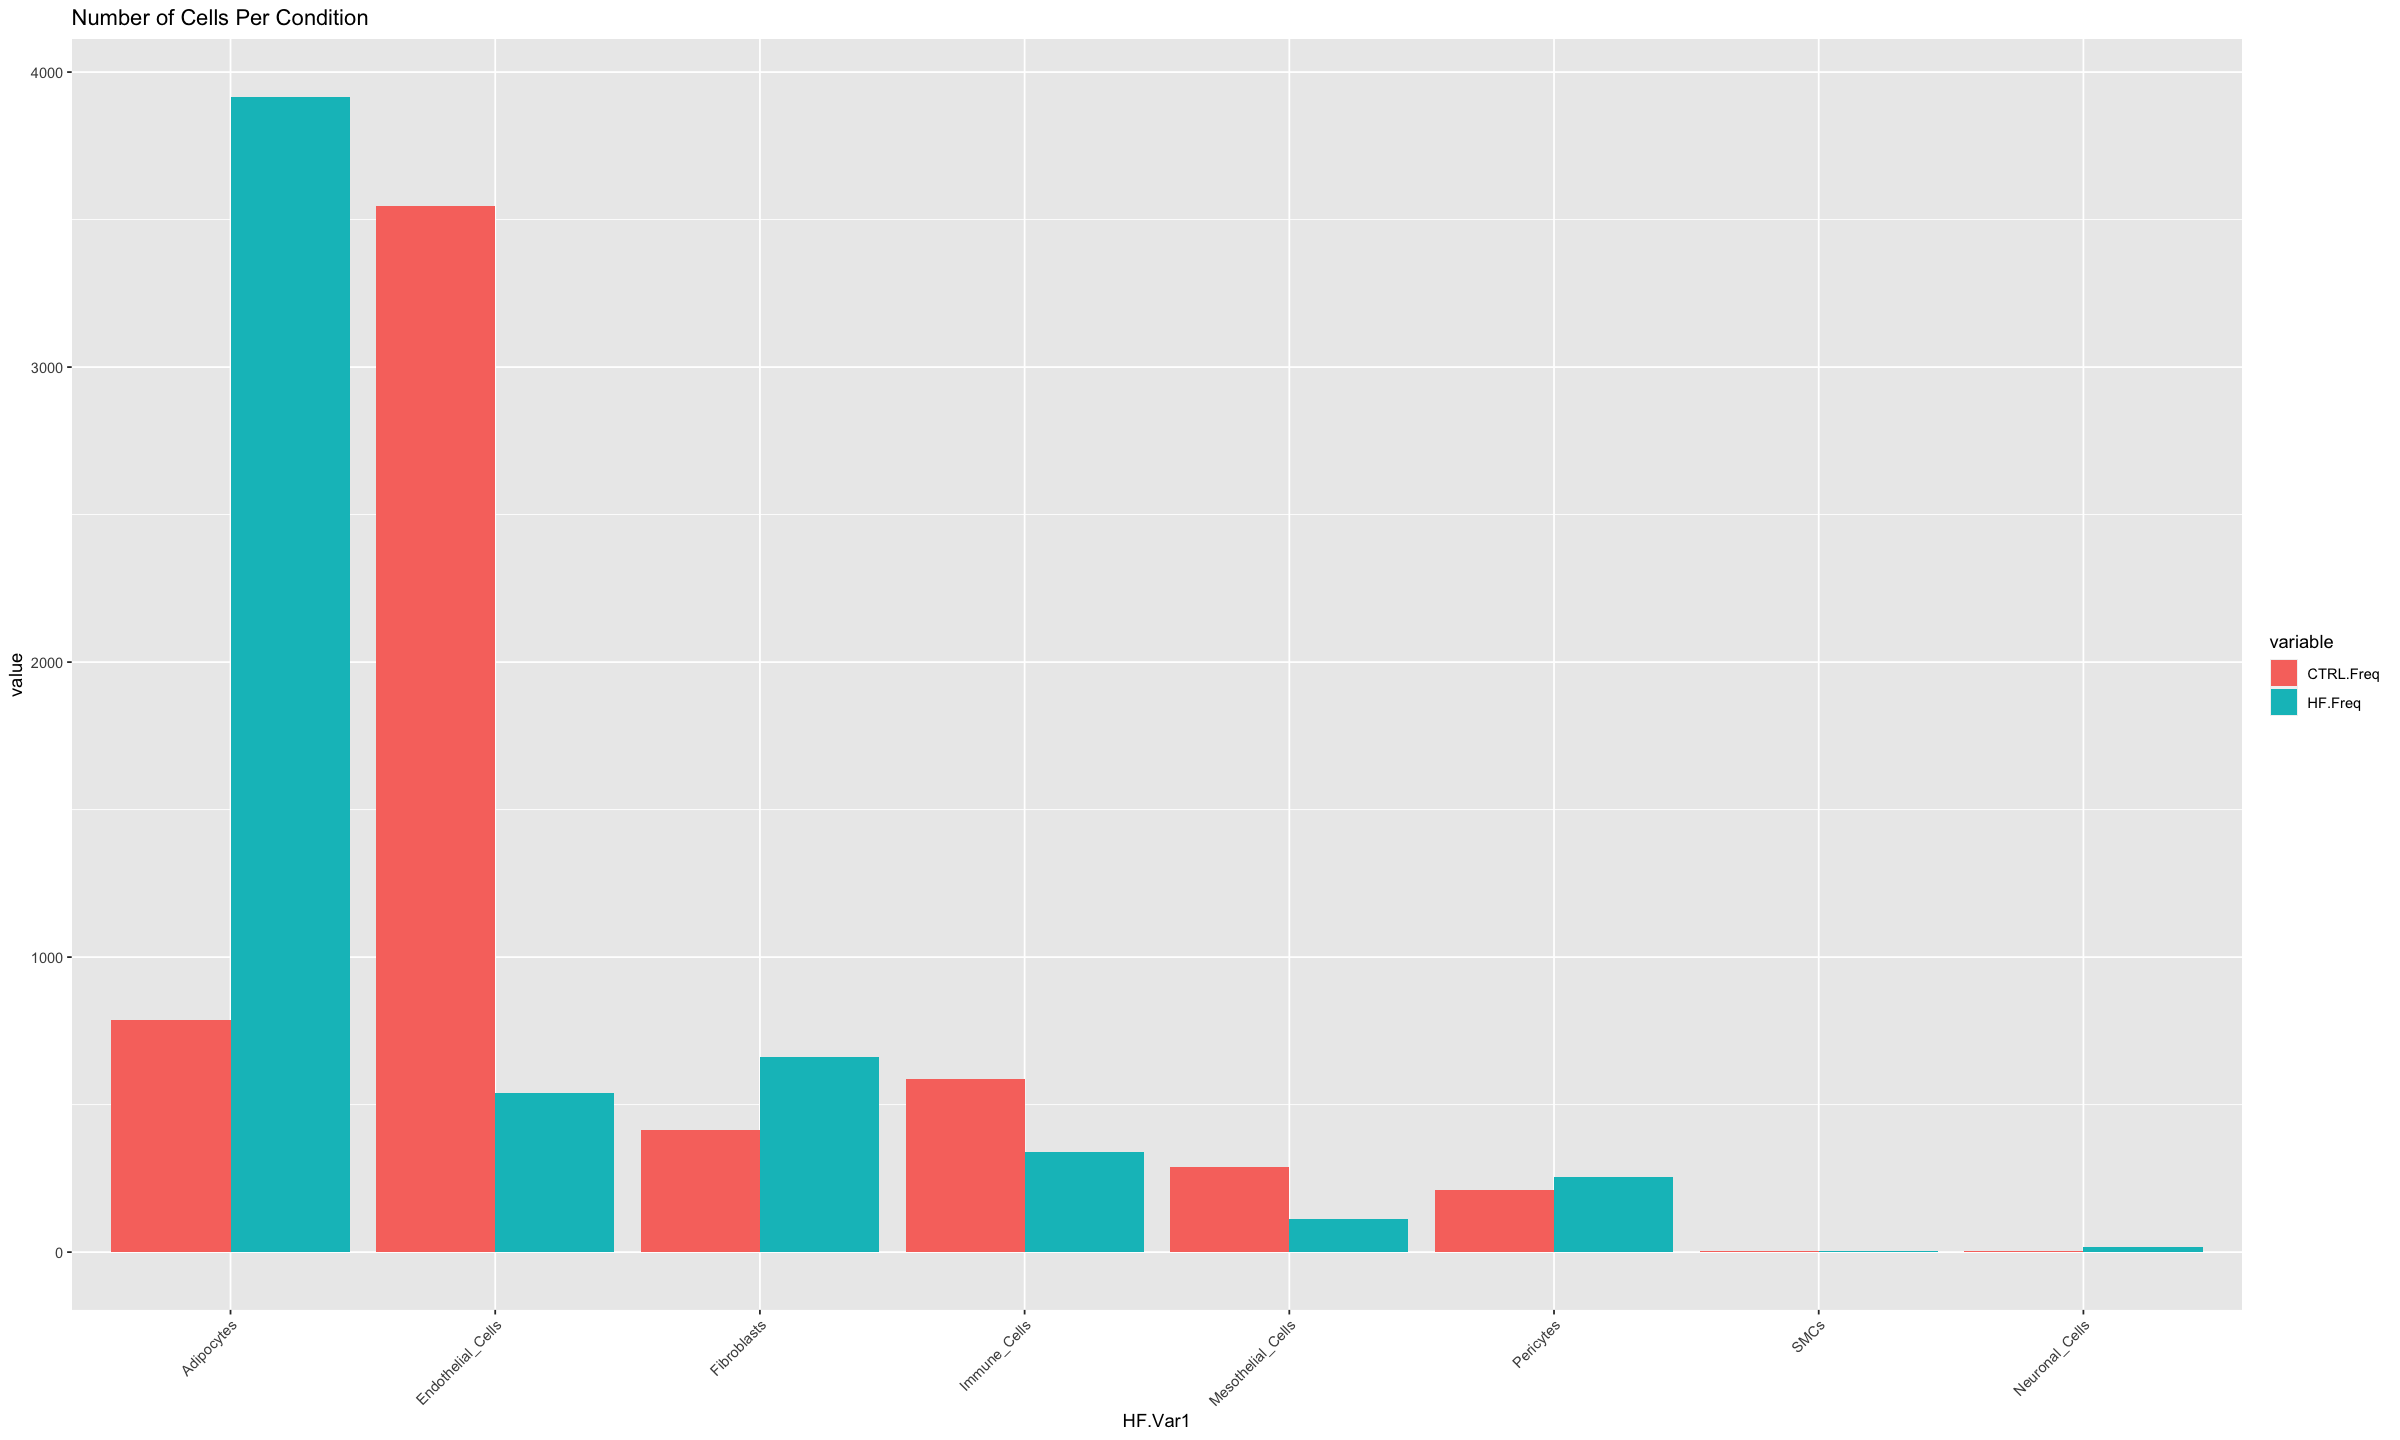

In [13]:
options(repr.plot.width=20, repr.plot.height=12)

ggplot(data = distribution,aes(x = HF.Var1,y=value,fill = variable))+geom_bar(stat='identity',position='dodge')+
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1))+
  ggtitle('Number of Cells Per Condition')

In [14]:
ncol(data.list[[1]])==ncol(data.list[[2]])

[1] TRUE

In [15]:
table(data.list[[1]]@meta.data['celltype_broad'])
table(data.list[[2]]@meta.data['celltype_broad'])

celltype_broad
       Adipocytes Endothelial_Cells       Fibroblasts      Immune_Cells 
             3547               588               788               413 
Mesothelial_Cells    Neuronal_Cells         Pericytes              SMCs 
              212                 4               288                 3 

celltype_broad
       Adipocytes Endothelial_Cells       Fibroblasts      Immune_Cells 
             3917               538               660               340 
Mesothelial_Cells    Neuronal_Cells         Pericytes              SMCs 
              113                16               255                 4 

In [16]:
# Run NICHES on each system and store/name the outputs
scc.list <- list()
for(i in 1:length(data.list)){
  print(i)
  scc.list[[i]] <- RunNICHES(data.list[[i]],
                             LR.database="fantom5",
                             species="mouse",
                             assay="RNA",
                             cell_types = 'celltype_broad',
                             min.cells.per.ident=1,
                             min.cells.per.gene = 50,
                             meta.data.to.map = c('orig.ident','celltype_broad','sample_type'),
                             SystemToCell = T,
                             CellToCell = T,
                             blend = 'mean')
}
names(scc.list) <- names(data.list)

[1] 1


Set cell types as Identity of object internally


 Subsetting to populations with greater than 1 cells


 Subsetting to genes expressed in greater than 50 cells


 5843 distinct cells from 8 celltypes to be analyzed


 Limiting ground truth to genes within dataset


 Mapping against 718 ground truth signaling mechanisms


 For sampling purposes, please make sure that the active Identity of the input seurat object corresponds to cell types

Normalizing layer: counts


 16763 Cell-To-Cell edges computed, sampling 64 distinct VectorTypes, out of 64 total possible

Normalizing layer: counts


 5843 System-To-Cell edges were computed, across 8 cell types



[1] 2


Set cell types as Identity of object internally


 Subsetting to populations with greater than 1 cells


 Subsetting to genes expressed in greater than 50 cells


 5843 distinct cells from 8 celltypes to be analyzed


 Limiting ground truth to genes within dataset


 Mapping against 601 ground truth signaling mechanisms


 For sampling purposes, please make sure that the active Identity of the input seurat object corresponds to cell types

Normalizing layer: counts


 14773 Cell-To-Cell edges computed, sampling 64 distinct VectorTypes, out of 64 total possible

Normalizing layer: counts


 5843 System-To-Cell edges were computed, across 8 cell types



In [17]:
scc.list

$taPVAT_Control_8W_M
$taPVAT_Control_8W_M$CellToCell
An object of class Seurat 
718 features across 16763 samples within 1 assay 
Active assay: CellToCell (718 features, 0 variable features)
 2 layers present: counts, data

$taPVAT_Control_8W_M$SystemToCell
An object of class Seurat 
718 features across 5843 samples within 1 assay 
Active assay: SystemToCell (718 features, 0 variable features)
 2 layers present: counts, data


$taPVAT_HF_8W_M
$taPVAT_HF_8W_M$CellToCell
An object of class Seurat 
601 features across 14773 samples within 1 assay 
Active assay: CellToCell (601 features, 0 variable features)
 2 layers present: counts, data

$taPVAT_HF_8W_M$SystemToCell
An object of class Seurat 
601 features across 5843 samples within 1 assay 
Active assay: SystemToCell (601 features, 0 variable features)
 2 layers present: counts, data



In [27]:
as.data.frame(GetAssayData(scc.list$taPVAT_Control_8W_M$SystemToCell, slot = "counts"))

System—AAACGAACACGACGAA-1-0 System—AAACGCTGTATGAGGC-1-0
Adam10—Axl     0                           0                          
Adam10—Epha3   0                           0                          
Adam12—Itga9   0                           0                          
Adam12—Itgb1   0                           0                          
Adam12—Sdc4    0                           0                          
Adam15—Itga5   0                           0                          
Adam15—Itga9   0                           0                          
Adam15—Itgav   0                           0                          
Adam15—Itgb1   0                           0                          
Adam15—Itgb3   0                           0                          
Adam17—Erbb4   0                           0                          
Adam17—Itga5   0                           0                          
Adam17—Itgb1   0                           0                          
Adam17—Notch1  0                           0                          
Adam23—Itga5   0                           0                          
Adam23—Itgb3   0                           0                          
Adam28—Itga4   0                           0                          
Adam9—Itga3    0                           0                          
Adam9—Itga6    0                           0                          
Adam9—Itgav    0                           0                          
Adam9—Itgb1    0                           0                          
Adam9—Itgb5    0                           0                          
Adipoq—Adipor1 0                           0                          
Adipoq—Adipor2 0                           0                          
Adm—Calcrl     0                           0                          
Angpt1—Itga5   0                           0                          
Angpt1—Itgb1   0                           0                          
Angpt1—Tek     0                           0                          
Angpt1—Tie1    0                           0                          
Angpt2—Tek     0                           0                          
⋮              ⋮                           ⋮                          
Vegfc—Flt4     0                           0                          
Vegfc—Itga9    0                           0                          
Vegfc—Itgb1    0                           0                          
Vegfc—Kdr      0                           0                          
Vegfc—Nrp2     0                           0                          
Vegfc—Vipr2    0                           0                          
Vim—Cd44       0                           0                          
Vtn—Cd47       0                           0                          
Vtn—Itga3      0                           0                          
Vtn—Itga5      0                           0                          
Vtn—Itga8      0                           0                          
Vtn—Itgav      0                           0                          
Vtn—Itgb1      0                           0                          
Vtn—Itgb3      0                           0                          
Vtn—Itgb5      0                           0                          
Vtn—Itgb8      0                           0                          
Vtn—Kdr        0                           0                          
Vtn—Plaur      0                           0                          
Vtn—Pvr        0                           0                          
Vtn—Tnfrsf11b  0                           0                          
Vwf—Sirpa      0                           0                          
Vwf—Tnfrsf11b  0                           0                          
Wnt5a—Fzd4     0                           0                          
Wnt5a—Fzd6     0                           0                          
Wnt5a—Fzd8     0                       

In [18]:
temp.list <- list()
for(i in 1:length(scc.list)){
temp.list[[i]] <- scc.list[[i]]$SystemToCell # Isolate SystemToCell Signaling, which is all that will be covered in this vignette
temp.list[[i]]$Condition <- names(scc.list)[i] # Tag with metadata
}

In [19]:
temp.list[[1]]@meta.data

orig.ident    nCount_SystemToCell
System—AAACGAACACGACGAA-1-0 SeuratProject  30.98945          
System—AAACGCTGTATGAGGC-1-0 SeuratProject  36.04279          
System—AAAGAACAGGGCAGGA-1-0 SeuratProject  25.39826          
System—AAAGAACCAAATGCTC-1-0 SeuratProject  51.80287          
System—AAAGAACGTTCGAACT-1-0 SeuratProject  60.55676          
System—AAAGGATGTACAAGTA-1-0 SeuratProject  33.35035          
System—AAAGGTACAATCACGT-1-0 SeuratProject  49.26902          
System—AAAGGTAGTTAATCGC-1-0 SeuratProject 112.02663          
System—AAAGGTATCAACCTCC-1-0 SeuratProject  56.52504          
System—AAAGTCCAGTGAGGCT-1-0 SeuratProject  39.85167          
System—AAAGTCCGTCAATGGG-1-0 SeuratProject  68.53983          
System—AAAGTGAAGACATCAA-1-0 SeuratProject  67.42833          
System—AAAGTGAGTGGCTAGA-1-0 SeuratProject  37.52128          
System—AAATGGACAAACCATC-1-0 SeuratProject  27.93660          
System—AAATGGACAATTGAGA-1-0 SeuratProject  64.06228          
System—AAATGGATCCCGAGAC-1-0 SeuratProject  42.46360          
System—AAATGGATCCTCTGCA-1-0 SeuratProject  42.33212          
System—AAATGGATCGCTGTCT-1-0 SeuratProject  42.79846          
System—AACAAAGCACAATGCT-1-0 SeuratProject  97.42953          
System—AACAACCCAATGAAAC-1-0 SeuratProject  47.32804          
System—AACAACCTCTCTGACC-1-0 SeuratProject  53.91889          
System—AACAACCTCTTCGTGC-1-0 SeuratProject  46.91020          
System—AACAAGATCGCGGACT-1-0 SeuratProject  97.72681          
System—AACACACAGGAATTAC-1-0 SeuratProject  11.21755          
System—AACACACAGGTGTGAC-1-0 SeuratProject  65.76228          
System—AACACACGTTGAAGTA-1-0 SeuratProject  49.82098          
System—AACACACTCGCGCTGA-1-0 SeuratProject  47.90910          
System—AACAGGGGTTACCTTT-1-0 SeuratProject  51.46349          
System—AACCAACCAGCTTTCC-1-0 SeuratProject  47.72425          
System—AACCAACTCGCCAGTG-1-0 SeuratProject  64.79407          
⋮                           ⋮             ⋮                  
System—TTGGTTTGTTTCGTGA-1-2 SeuratProject  87.53112          
System—TTGGTTTTCATGCTAG-1-2 SeuratProject 118.62587          
System—TTGGTTTTCTAAGGAA-1-2 SeuratProject  24.23012          
System—TTGTGGACAATCAGCT-1-2 SeuratProject  65.43969          
System—TTGTGTTTCGCACGGT-1-2 SeuratProject  26.41778          
System—TTGTTCAAGAGGCTGT-1-2 SeuratProject  31.55305          
System—TTGTTCATCATACGAC-1-2 SeuratProject 116.25433          
System—TTGTTGTAGGGATCTG-1-2 SeuratProject  44.63336          
System—TTGTTGTCACGCAAAG-1-2 SeuratProject  64.36099          
System—TTGTTGTGTACTGTTG-1-2 SeuratProject  65.42314          
System—TTGTTTGGTCGACGCT-1-2 SeuratProject  79.42638          
System—TTTACGTTCCTAGAGT-1-2 SeuratProject  62.37300          
System—TTTACTGGTCGAGTGA-1-2 SeuratProject  58.99634          
System—TTTAGTCAGGATCACG-1-2 SeuratProject  70.84463          
System—TTTATGCCACAAGCAG-1-2 SeuratProject  85.84231          
System—TTTCACAAGAGTTGCG-1-2 SeuratProject  54.47969          
System—TTTCACACAAGCTGCC-1-2 SeuratProject  40.11048          
System—TTTCATGTCCAACCGG-1-2 SeuratProject  47.43217          
System—TTTCCTCTCCGGTAGC-1-2 SeuratProject  51.68268          
System—TTTCGATAGCCTGGAA-1-2 SeuratProject  73.75678          
System—TTTCGATTCGTTACCC-1-2 SeuratProject  76.18774          
System—TTTGACTAGCTGTACT-1-2 SeuratProject  76.29263          
System—TTTGACTCAAGTCCCG-1-2 SeuratProject  26.46649          
System—TTTGACTCACTGTTCC-1-2 SeuratProject  79.45860          
System—TTTGACTTCGTGCATA-1-2 SeuratProject  91.57740          
System—TTTGATCGTGCTGATT-1-2 SeuratProject 131.08096          
System—TTTGGAGAGGACGCAT-1-2 SeuratProject  97.21578          
System—TTTGGAGTCAAGCTTG-1-2 SeuratProject 114.11312          
System—TTTGTTGAGACGGATC-1-2 SeuratProject  63.92614          
System—TTTGTTGAGATACGAT-1-2 SeuratProject  47.44560          
                            nFeature_SystemToCell ReceivingCell       
System—AAACGAACACGACGAA-1-0  51                   AAACGAACACGACGAA-1-0
System—AAACGCTGTATGAGGC-1-0  46           

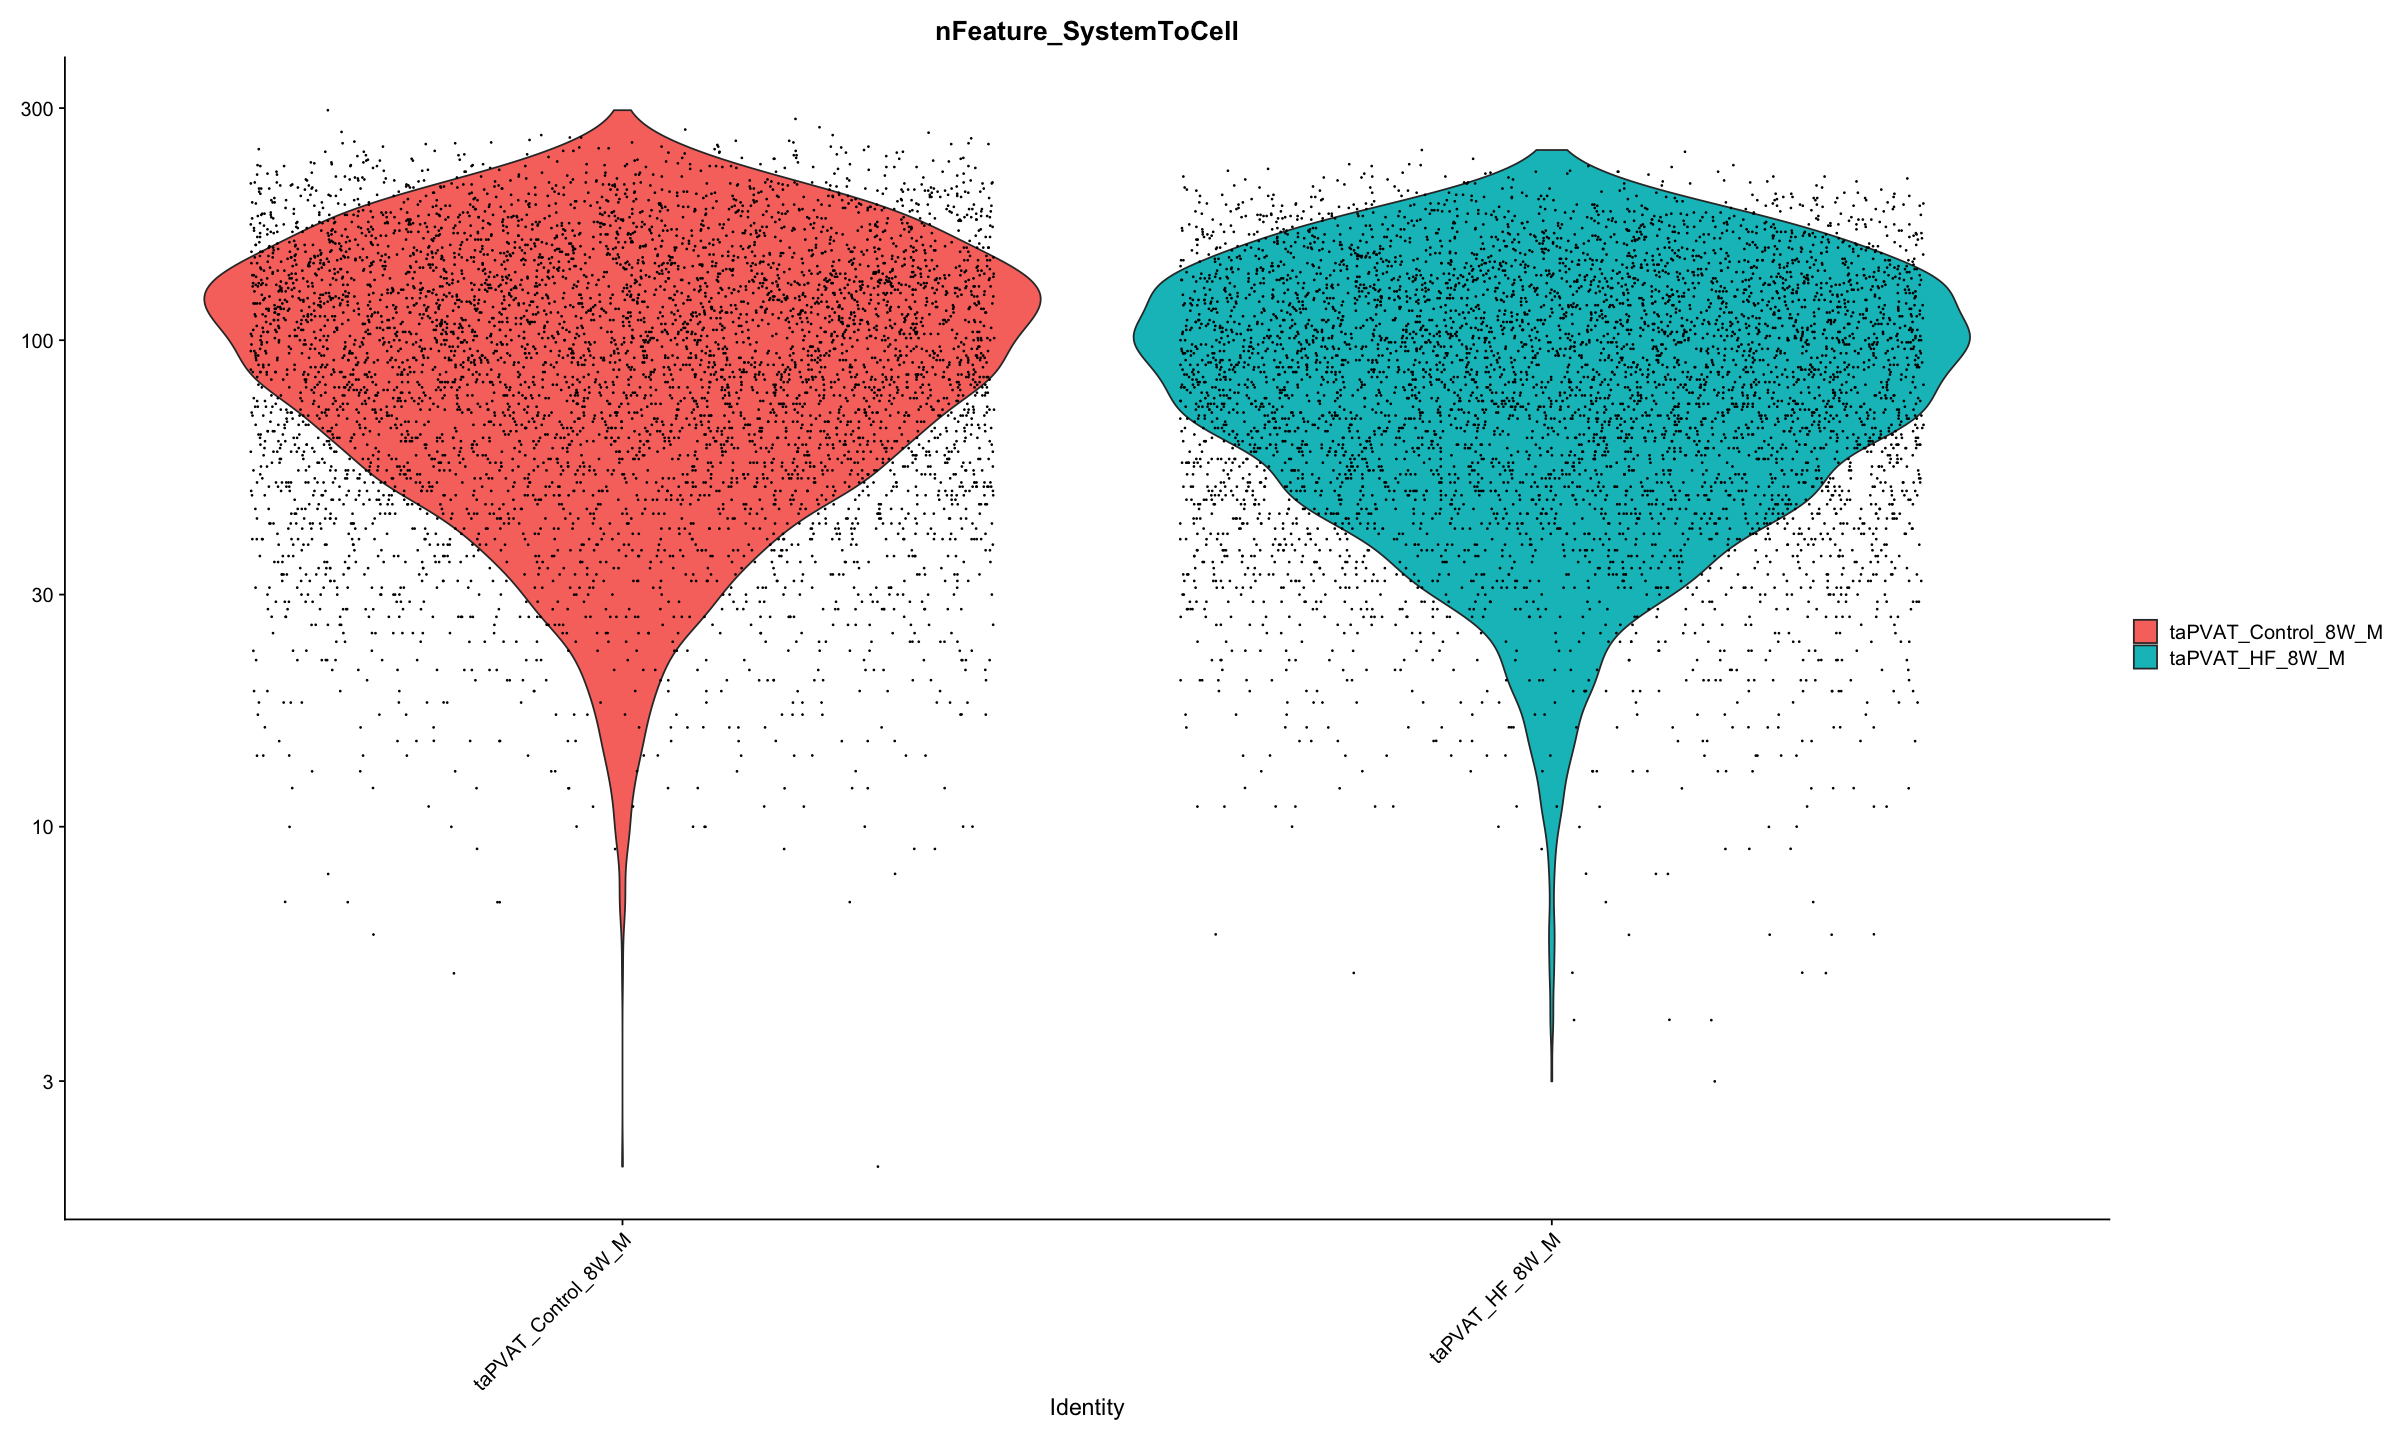

In [20]:
# Merge together
scc.merge <- merge(temp.list[[1]],temp.list[2])

# Clean up low-information crosses (connectivity data can be very sparse)
VlnPlot(scc.merge,features = 'nFeature_SystemToCell',group.by = 'Condition',pt.size=0.1,log = T)

In [21]:
scc.sub <- subset(scc.merge,nFeature_SystemToCell > 5) # Requesting at least 5 distinct ligand-receptor interactions per measurement

Centering and scaling data matrix

Finding variable features for layer data.1

Finding variable features for layer data.2

PC_ 1 
Positive:  Tfpi—Lrp1, Calr—Lrp1, Serpine2—Lrp1, App—Lrp1, F8—Lrp1, Psap—Lrp1, Hsp90b1—Lrp1, Lpl—Lrp1, Plat—Lrp1, Lrpap1—Lrp1 
	   Serping1—Lrp1, Pdgfb—Lrp1, Apoe—Lrp1, Ntf3—Ntrk3, Ptn—Ptprs, Hspg2—Ptprs, Gnas—Adrb3, Nrg2—Erbb4, Rtn4—Cntnap1, Tbc1d24—Cdon 
	   Adam17—Erbb4, Nrg4—Erbb4, Calr—Tshr, Egf—Erbb4, Gnas—Tshr, Fn1—Tshr, B2m—Tfrc, Gnai2—Tshr, Lrpap1—Sorl1, Nrg1—Erbb4 
Negative:  Col1a1—Itgb1, Lama2—Itgb1, Lamc1—Itgb1, Col6a2—Itgb1, Lamb1—Itgb1, Vtn—Itgb1, Nid1—Itgb1, Adam9—Itgb1, Adam12—Itgb1, Col6a1—Itgb1 
	   Fbn1—Itgb1, Cxcl12—Itgb1, Fn1—Itgb1, Col5a2—Itgb1, Col6a3—Itgb1, Col4a1—Itgb1, Fbln1—Itgb1, Timp2—Itgb1, Col1a2—Itgb1, Col18a1—Itgb1 
	   Hspg2—Itgb1, Adam15—Itgb1, Lama5—Itgb1, Col3a1—Itgb1, Col4a4—Itgb1, Reln—Itgb1, Npnt—Itgb1, Col4a5—Itgb1, Tgm2—Itgb1, Vcan—Itgb1 
PC_ 2 
Positive:  Ntf3—Ntrk3, Dkk2—Lrp6, Rspo3—Lrp6, Igfbp4—Lrp6, Rspo1—Lrp6, F

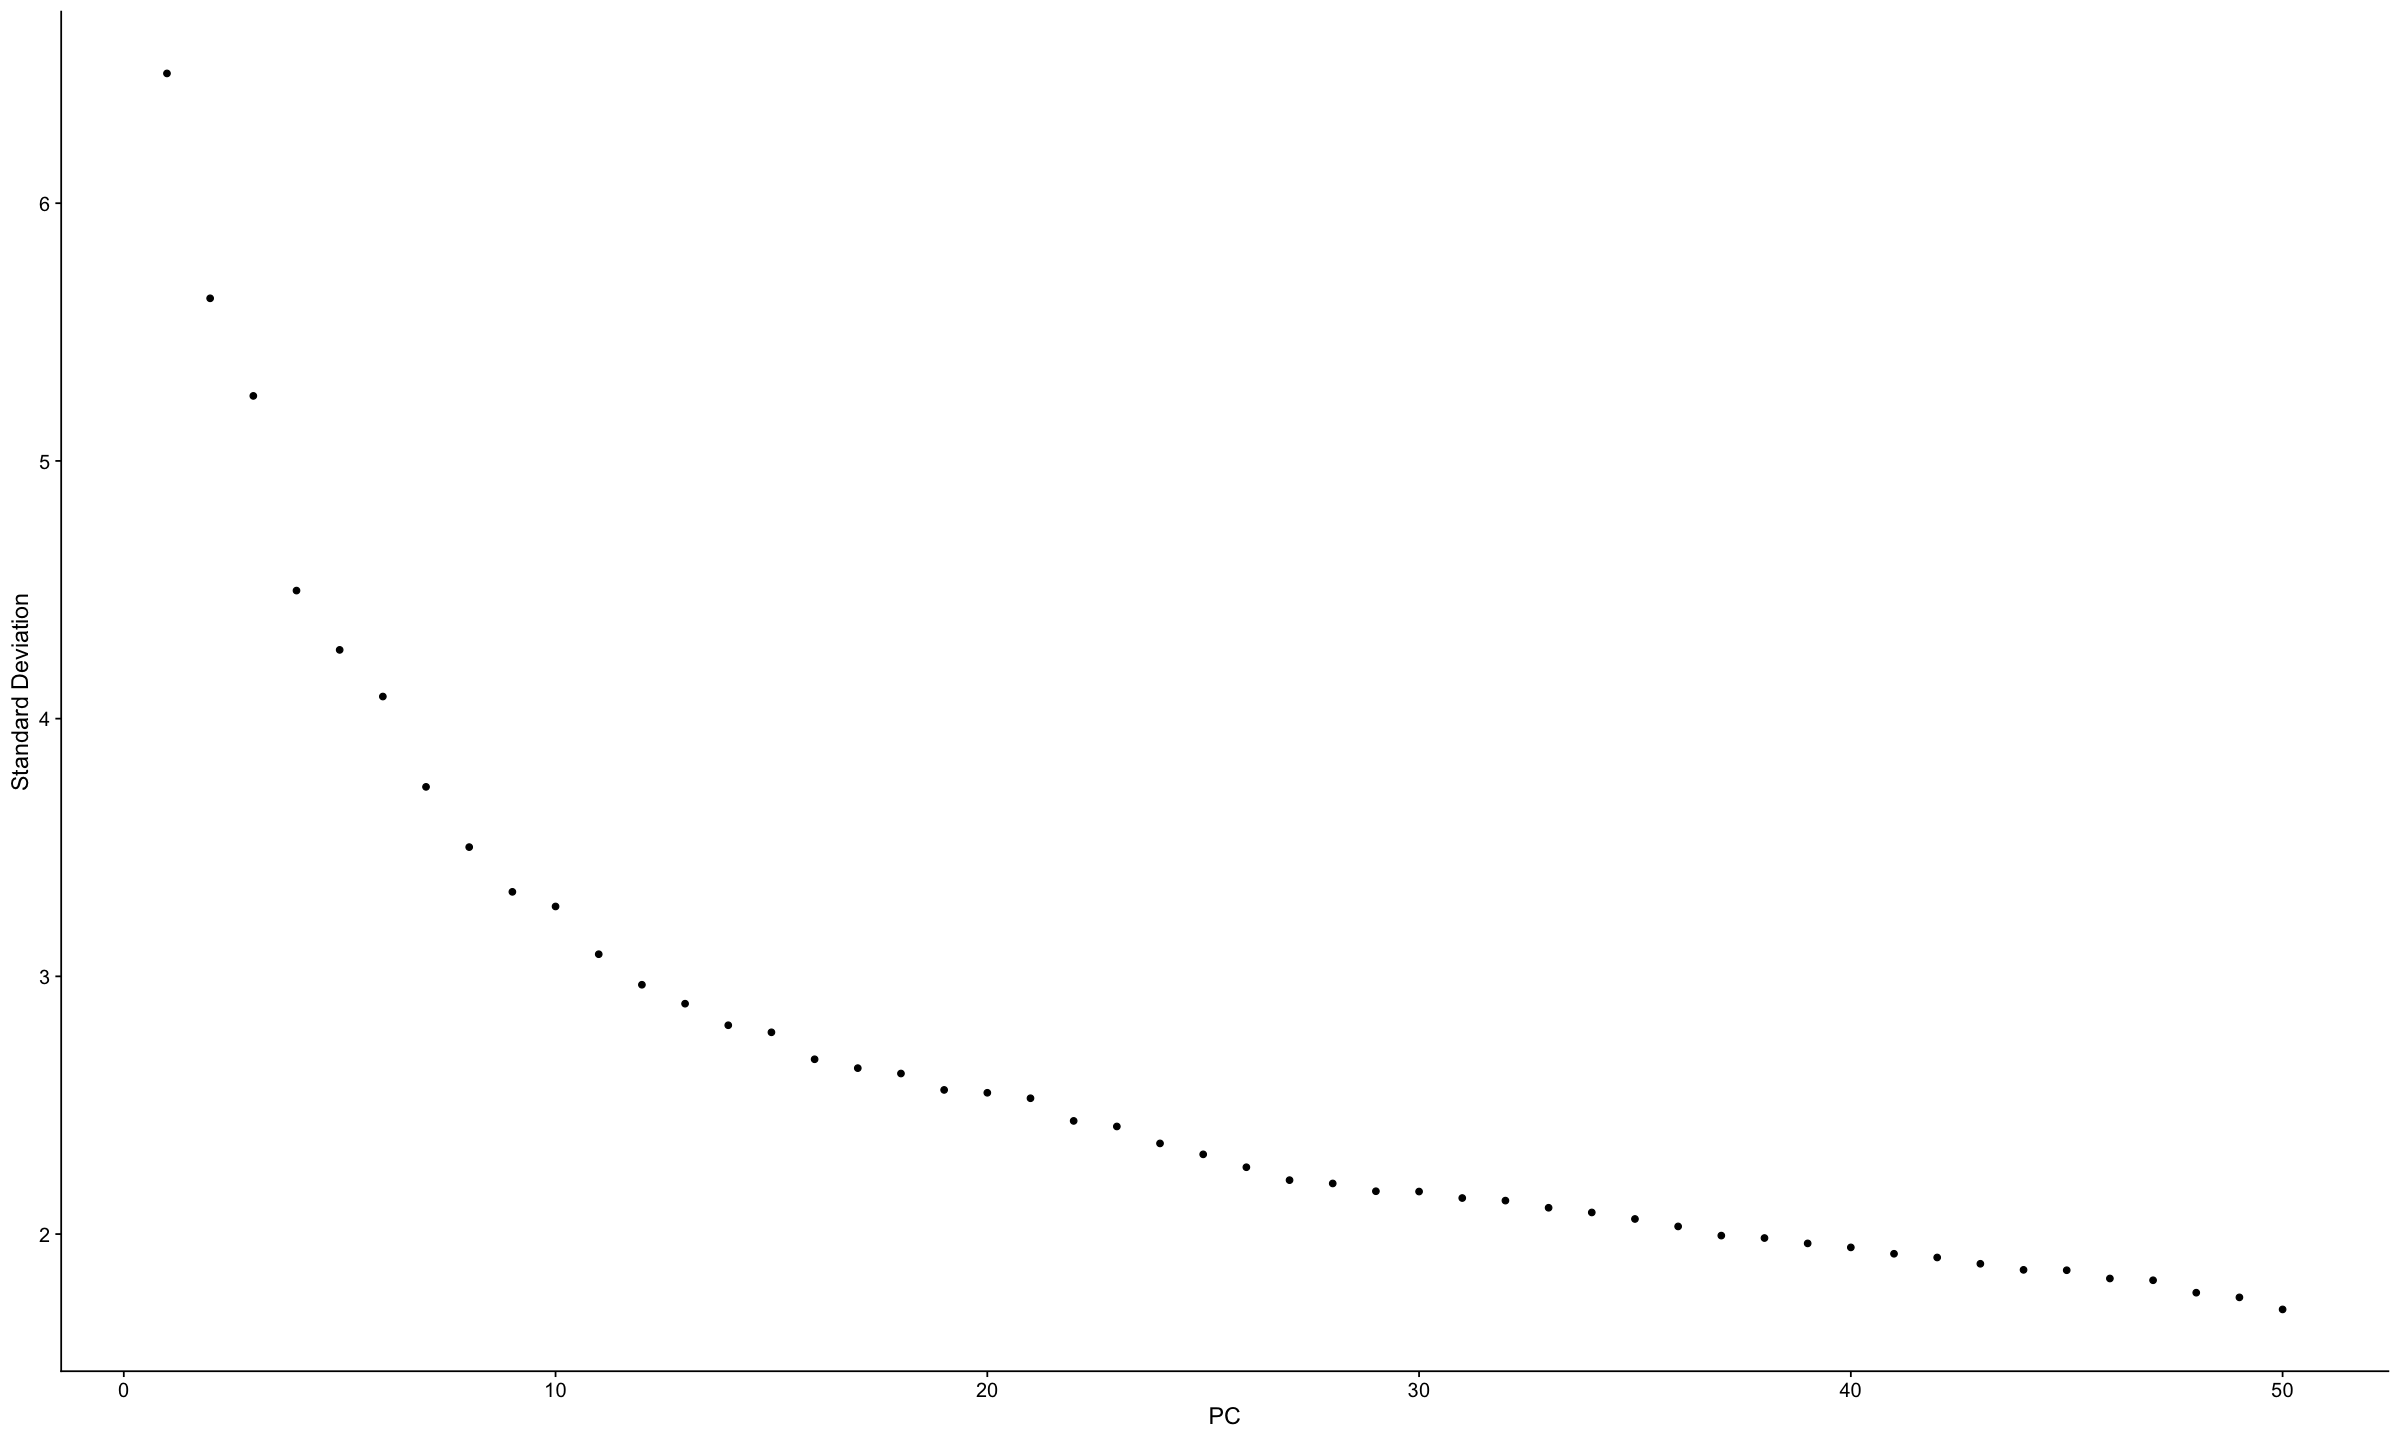

In [22]:
# Perform initial visualization
scc.sub <- ScaleData(scc.sub)
scc.sub <- FindVariableFeatures(scc.sub,selection.method = "disp")
scc.sub <- RunPCA(scc.sub,npcs = 50)
ElbowPlot(scc.sub,ndim=50)

14:38:38 UMAP embedding parameters a = 0.9922 b = 1.112

14:38:38 Read 11670 rows and found 10 numeric columns

14:38:38 Using Annoy for neighbor search, n_neighbors = 30

14:38:38 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

14:38:39 Writing NN index file to temp file /var/folders/kk/5gbzbkc93xb_g56p3bt9t8gh0000gp/T//RtmpzJ6iDU/file105518835490

14:38:39 Searching Annoy index using 1 thread, search_k = 3000

14:38:43 Annoy recall = 100%

14:38:43 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

14:38:44 Initializing from normalized Laplacian + noise (using RSpectra)

14:38:44 Commencing optimization for 200 epochs, with 457716 positive edges

14:38:54 Optimization finished



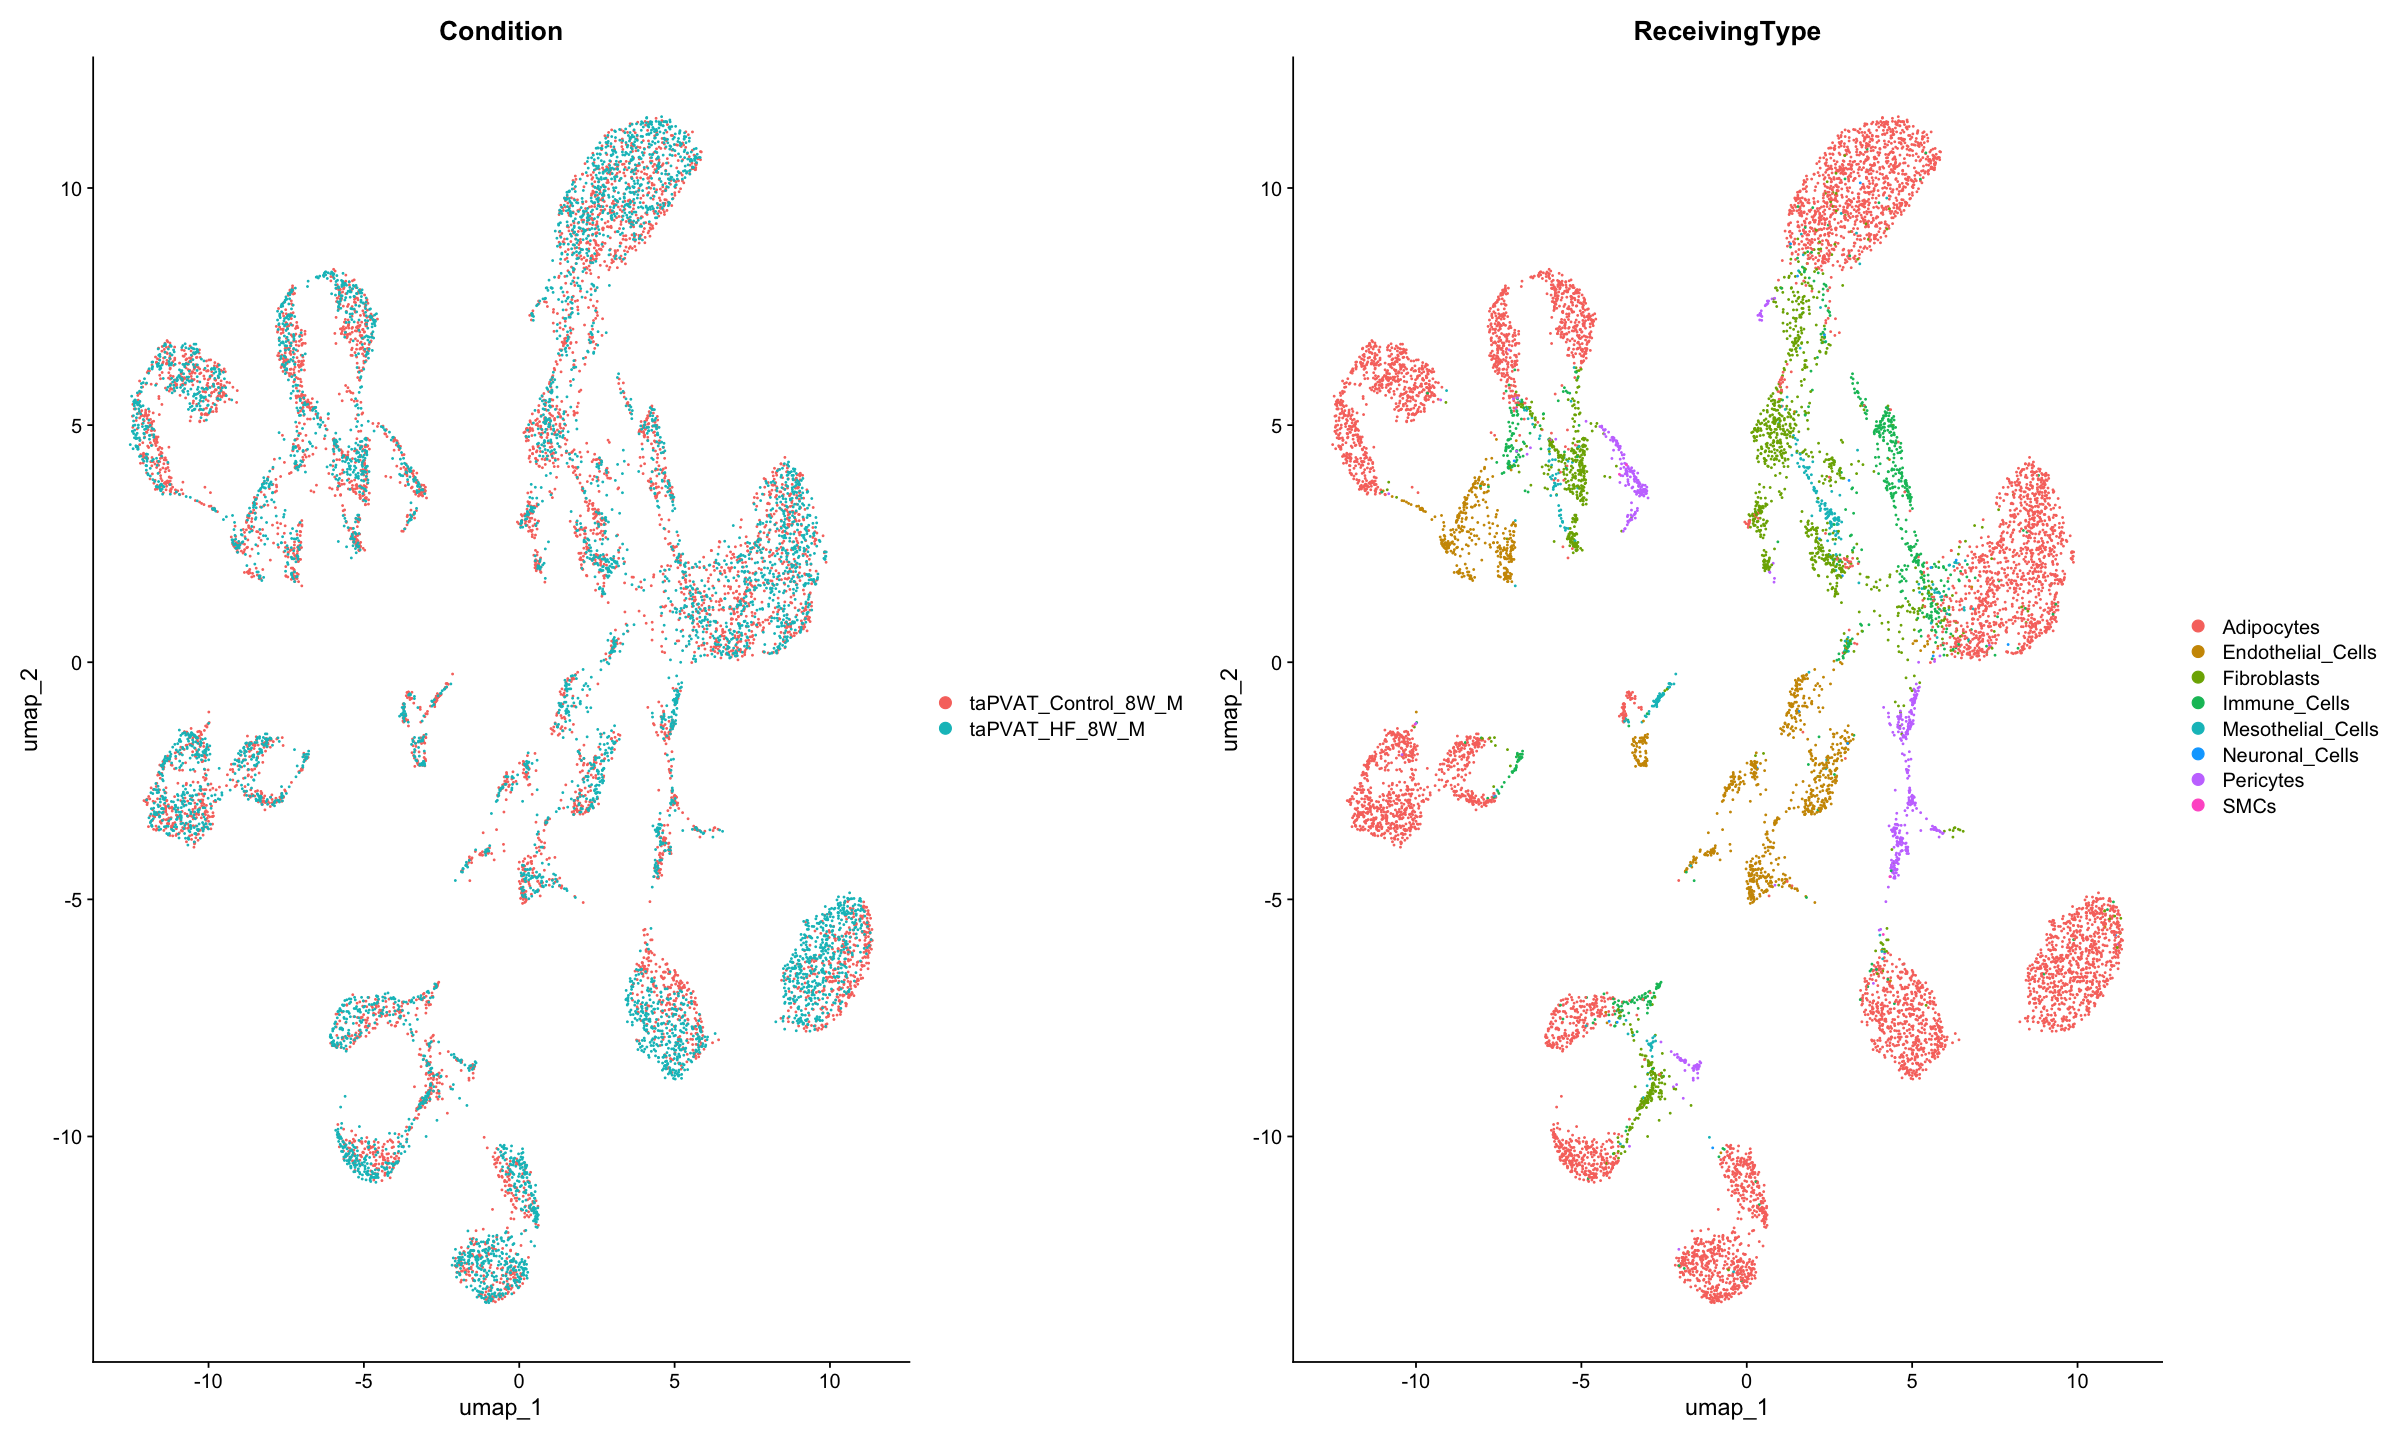

In [23]:
scc.sub <- RunUMAP(scc.sub,dims = 1:10)
p1 <- DimPlot(scc.sub,group.by = 'Condition')
p2 <- DimPlot(scc.sub,group.by = 'ReceivingType')
plot_grid(p1,p2)

In [24]:
unique(scc.sub@meta.data$ReceivingType)
COI <- "Adipocytes"

[1] "Fibroblasts"       "Adipocytes"        "Immune_Cells"     
[4] "Endothelial_Cells" "Pericytes"         "Mesothelial_Cells"
[7] "Neuronal_Cells"    "SMCs"

In [25]:
#saveRDS(scc.list, 'System2Cell.rds')

In [26]:
results <- lapply(COI, function(x){
 
  subs <- subset(scc.sub, subset = ReceivingType == x)

  subs <- JoinLayers(subs, layers = c("data", "scale.data"))
  
  print(paste0(x , ":  taPVAT_Control_8W_M:", sum(subs@meta.data$Condition == "taPVAT_Control_8W_M")))
  print(paste0(x , ":  taPVAT_HF_8W_M:", sum(subs@meta.data$Condition == "taPVAT_HF_8W_M")))
  
  Idents(subs) <- subs@meta.data$Condition
  
  FindVariableFeatures(subs,assay='SystemToCell',selection.method = "disp")
  ScaleData(subs, assay='SystemToCell')
  
  markers <- FindAllMarkers(subs, test.use = "roc",assay='SystemToCell',
                            min.pct = 0.1,logfc.threshold = 0.1,
                            return.thresh = 0.1,only.pos = T)
  print(markers)
  
  #subset to top 10 markers per condition
  top10 <- markers %>% group_by(cluster) %>% top_n(n = 10, wt = myAUC)
  list(subs = subs, top10 = top10)
  
  #Make a heatmap
  #DoHeatmap(subs,group.by="ident",features=top10$gene, assay="SystemToCell") +  ggtitle("Top DE SystemToCell Mechanisms, CTRL vs STIM: ",x)
 
  
})

options(repr.plot.width=20, repr.plot.height=12)
options(warn=-1)

subs <- results[[1]]$subs
top10 <- results[[1]]$top10

[1] "Adipocytes:  taPVAT_Control_8W_M:3545"
[1] "Adipocytes:  taPVAT_HF_8W_M:3913"


Finding variable features for layer data

Centering and scaling data matrix

Calculating cluster taPVAT_Control_8W_M

Calculating cluster taPVAT_HF_8W_M



                 myAUC     avg_diff power avg_log2FC pct.1 pct.2
Fgf2—Nrp1        0.859 0.0317658793 0.718  6.9932103 0.718 0.000
Rspo1—Lrp6       0.812 0.0379716749 0.624  0.6946588 0.850 0.904
Igfbp4—Lrp6      0.804 0.1134582596 0.608  0.7229966 0.850 0.904
Tgfb3—Tgfbr3     0.802 0.0386900791 0.604  7.2804456 0.604 0.000
Serpinc1—Lrp1    0.781 0.0156774919 0.562  5.9757501 0.561 0.000
Rspo3—Lrp6       0.775 0.0201427095 0.550  0.5031797 0.850 0.904
Cntn4—Ptprg      0.758 0.0254834604 0.516  6.6738675 0.517 0.000
Sema7a—Itga1     0.729 0.0149069067 0.458  5.9037967 0.458 0.000
Col4a6—Itga1     0.729 0.0198290349 0.458  6.3123241 0.458 0.000
Sema3e—Nrp1      0.717 0.0336790185 0.434  0.7751663 0.718 0.783
Fgf2—Fgfr1       0.716 0.0137477257 0.432  5.7884283 0.432 0.000
Tgfb3—Tgfbr2     0.706 0.0232362559 0.412  6.5405832 0.413 0.000
Bmp5—Bmpr2       0.706 0.0229886542 0.412  6.5251347 0.413 0.000
Dkk2—Lrp6        0.702 0.0300930302 0.404  0.3180732 0.850 0.904
Sema3a—Nrp1      0.683 0.

# System to Cell 

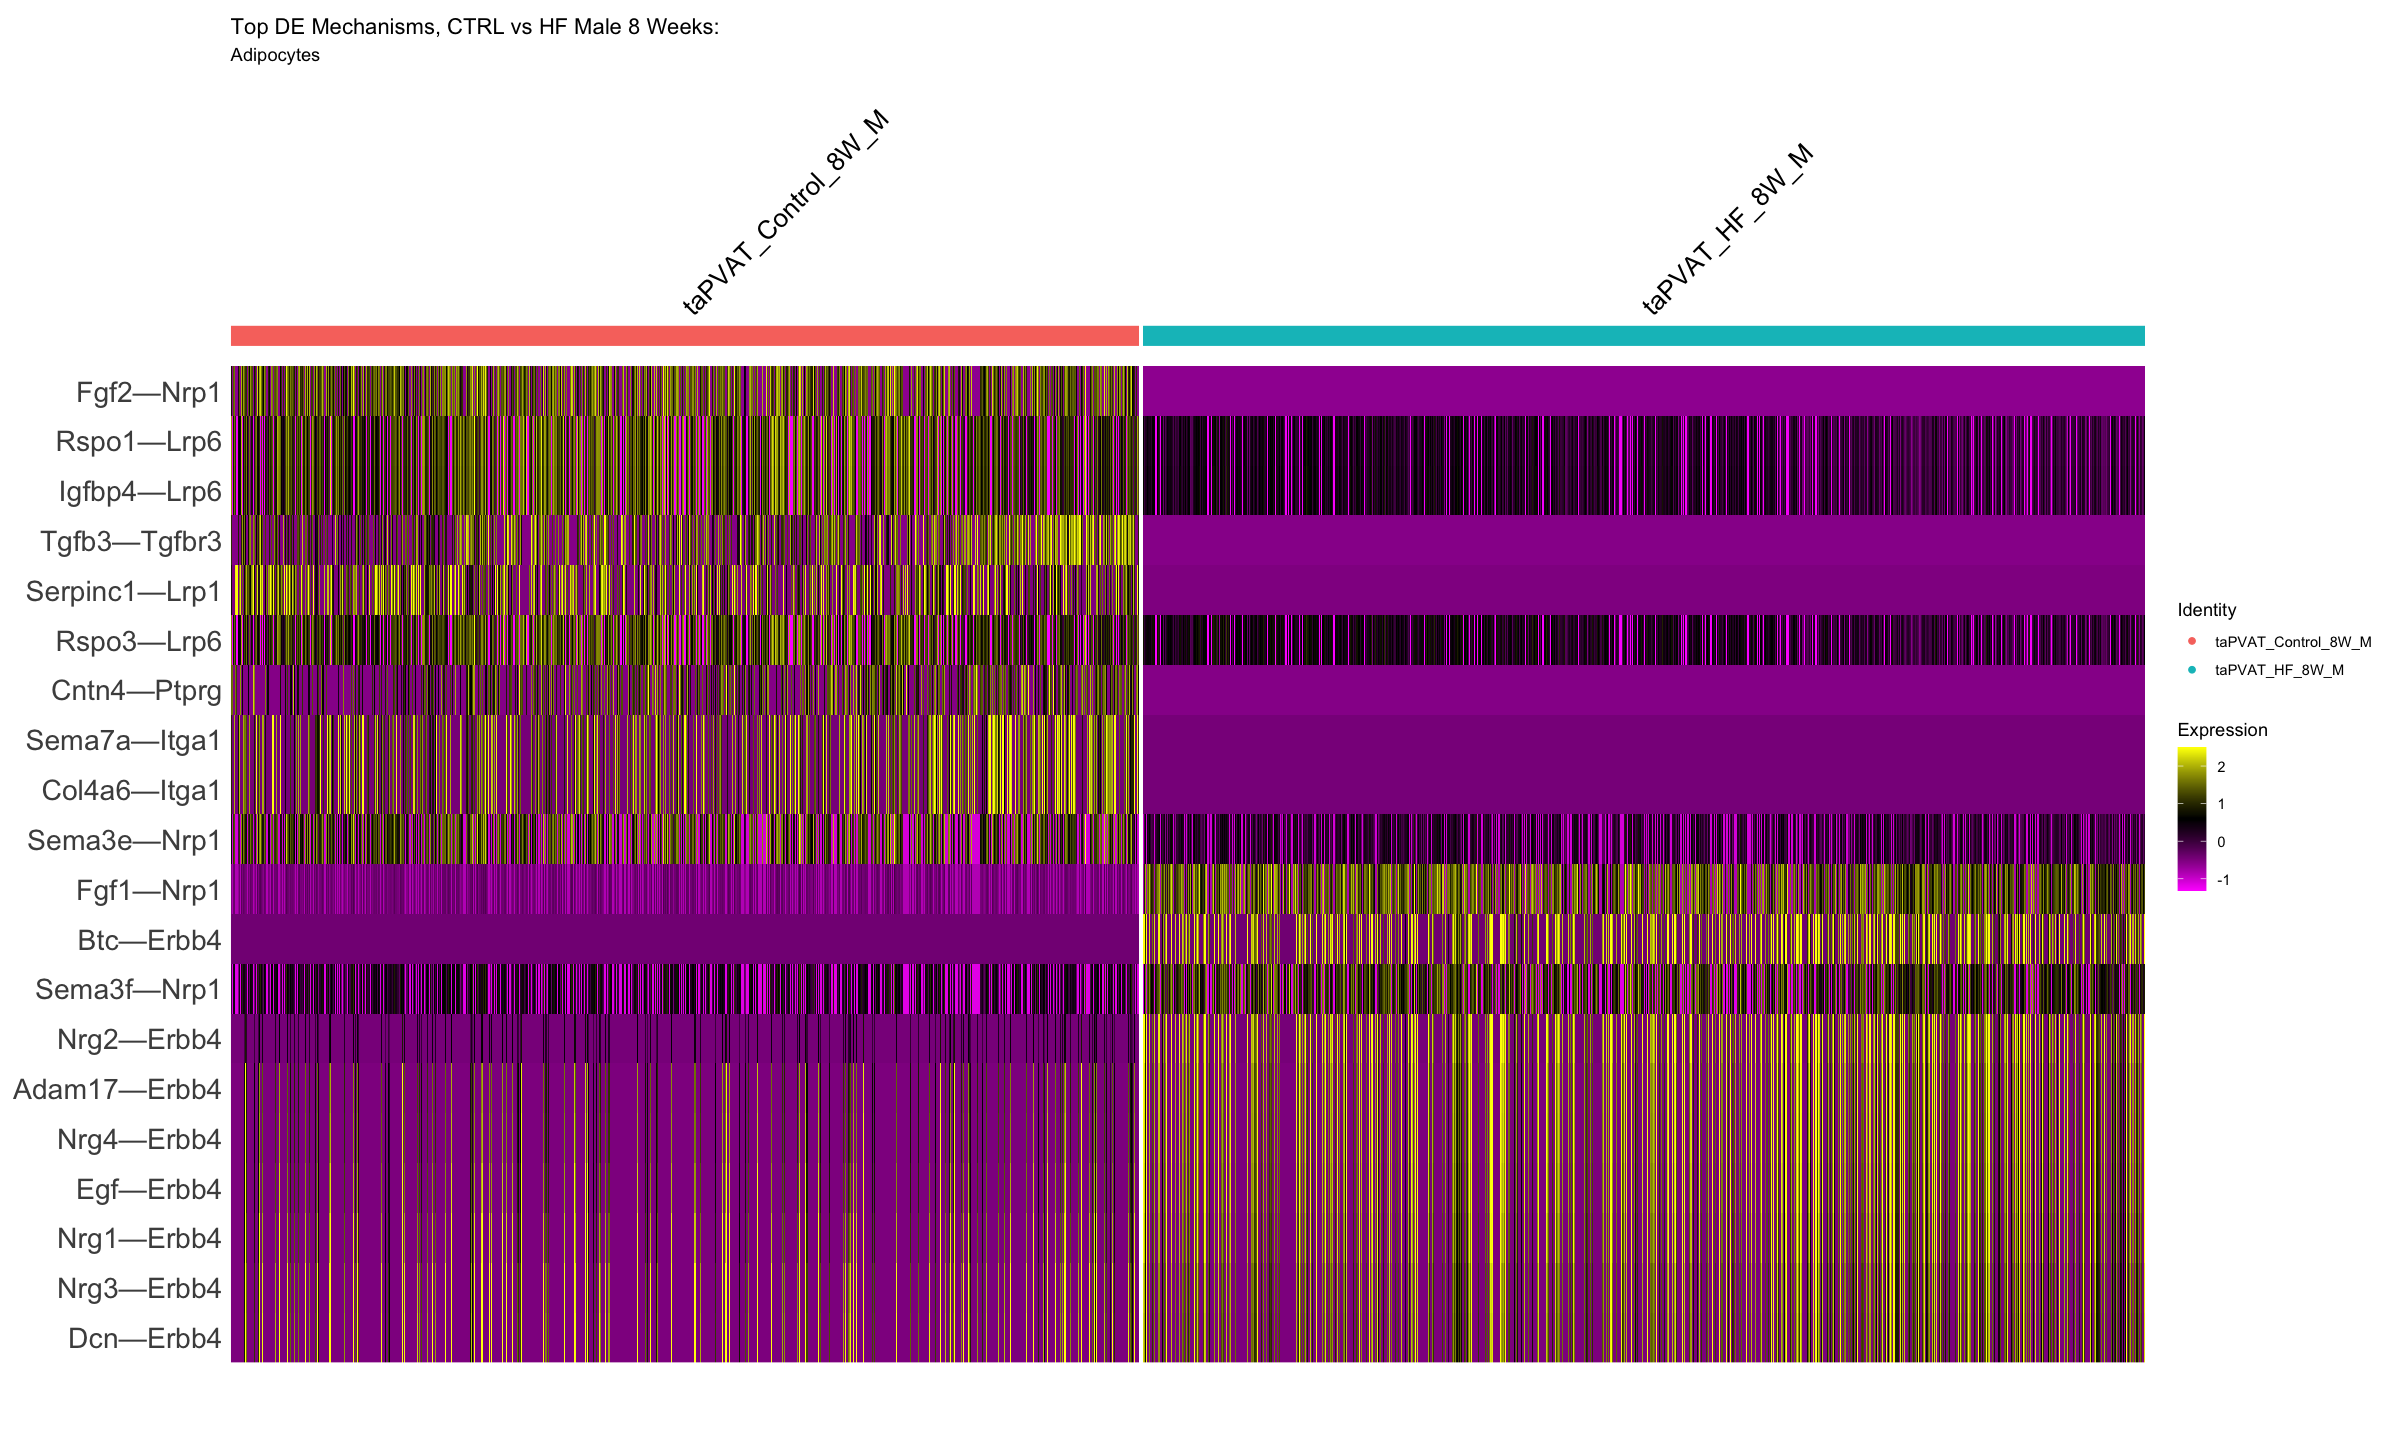

In [32]:
DoHeatmap(subs,group.by="ident",features=top10$gene, assay="SystemToCell") +  ggtitle("Top Interaction Mechanisms, CTRL vs HF Male 8 Weeks: ",COI) + theme(#axis.text.x = element_text(face = "italic", size = 20),
                                                                   axis.text.y = element_text(size = 17))
                                                                   #axis.title.x = element_text(size = 20),
                                                                   #axis.title.y = element_text(size = 20),
                                                                   #plot.title = element_text(hjust = 0.5))

The default behaviour of split.by has changed.
Separate violin plots are now plotted side-by-side.
To restore the old behaviour of a single split violin,
set split.plot = TRUE.
      
This message will be shown once per session.



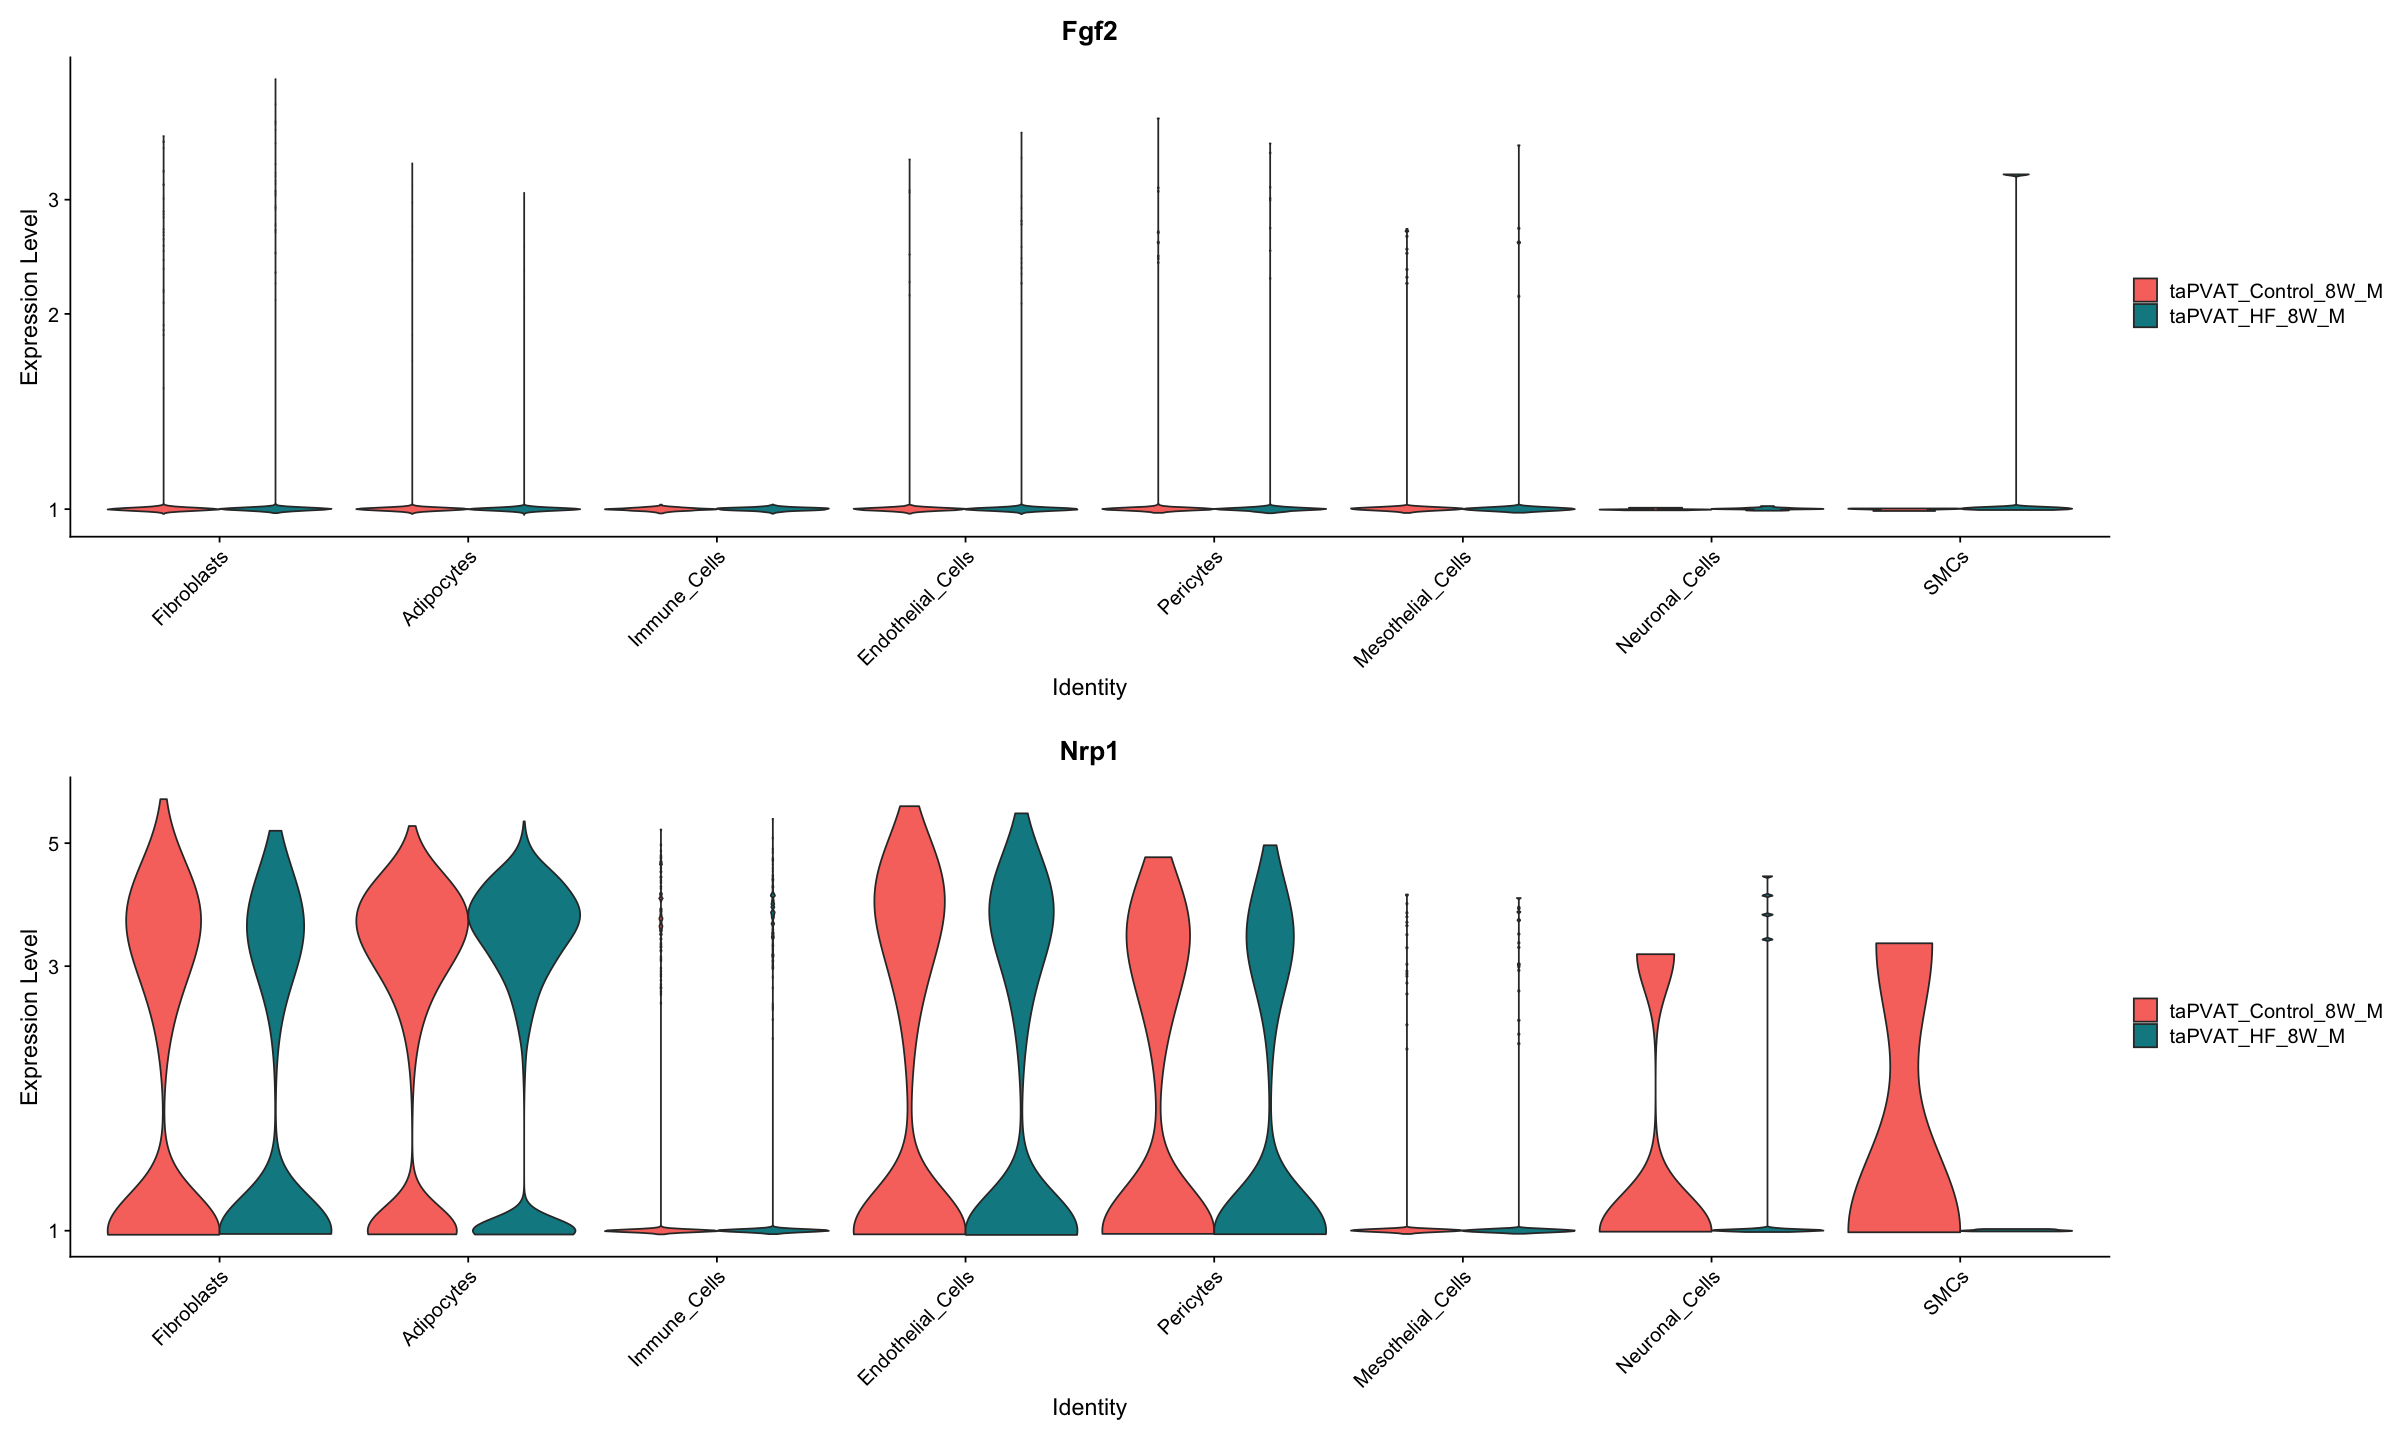

In [33]:
p1 <- VlnPlot(male_8weeks_rds,'Fgf2',split.by = 'sample_type',pt.size = 0,log=T)
p2 <- VlnPlot(male_8weeks_rds,'Nrp1',split.by = 'sample_type',pt.size = 0,log=T)
plot_grid(p1,p2,ncol=1)

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Rspo1—Lrp6' in 'mbcsToSbcs': dot substituted for <e2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Rspo1—Lrp6' in 'mbcsToSbcs': dot substituted for <80>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Rspo1—Lrp6' in 'mbcsToSbcs': dot substituted for <94>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Rspo1—Lrp6' in 'mbcsToSbcs': dot substituted for <e2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Rspo1—Lrp6' in 'mbcsToSbcs': dot substituted for <80>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Rspo1—Lrp6' in 'mbcsToSbcs': dot substituted for <94>”
Warning message in grid.Call(C_tex

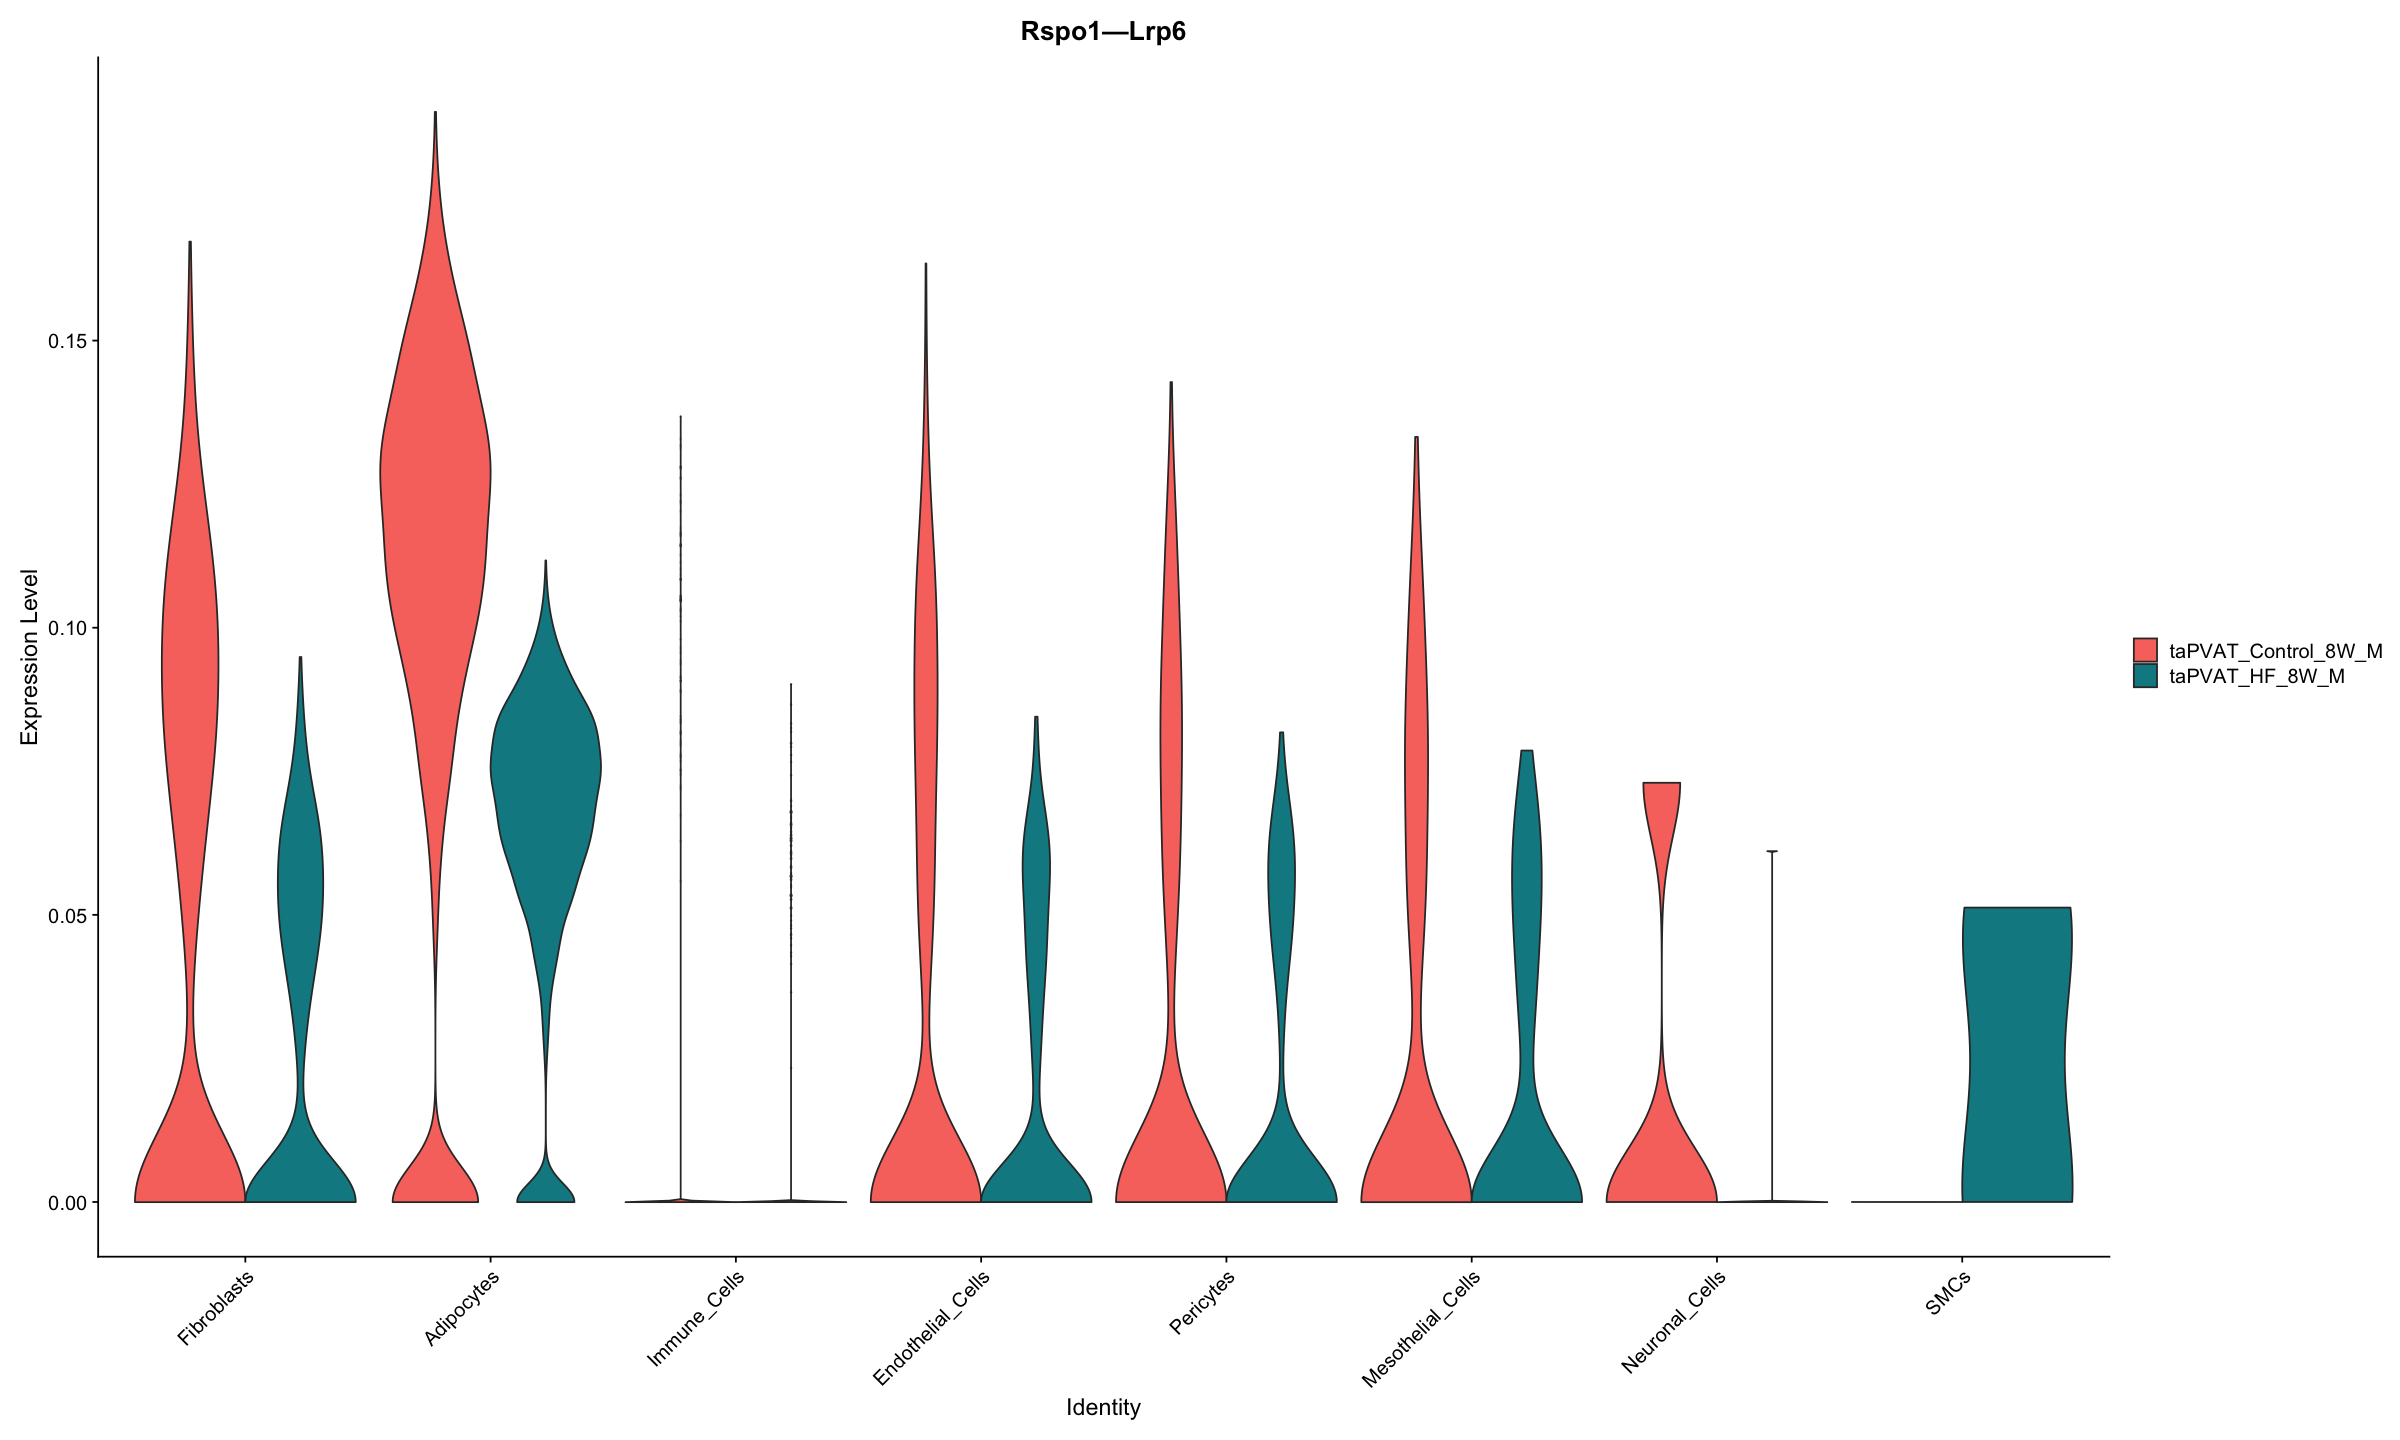

In [68]:
VlnPlot(scc.sub, 'Rspo1—Lrp6',split.by = 'Condition',pt.size = 0)

Centering and scaling data matrix

Warning message:
“Different features in new layer data than already exists for scale.data”
PC_ 1 
Positive:  Tfpi—Lrp1, Calr—Lrp1, Serpine2—Lrp1, App—Lrp1, F8—Lrp1, Psap—Lrp1, Hsp90b1—Lrp1, Lpl—Lrp1, Plat—Lrp1, Lrpap1—Lrp1 
	   Nxph1—Nrxn1, Serping1—Lrp1, Psen1—Notch1, Mfap5—Notch1, Dll1—Notch1, Uba52—Notch1, Dll4—Notch1, Adam17—Notch1, Jag1—Notch1, Jag2—Notch1 
	   Rarres2—Cmklr1, Pdgfb—Lrp1, Ptn—Ptprs, Calr—Tshr, Apoe—Lrp1, Gnas—Tshr, Fn1—Tshr, Hspg2—Ptprs, Gnai2—Tshr, Icam1—Egfr 
Negative:  Lama2—Itgb1, Col1a1—Itgb1, Lamc1—Itgb1, Nid1—Itgb1, Col6a2—Itgb1, Adam9—Itgb1, Lamb1—Itgb1, Vtn—Itgb1, Adam12—Itgb1, Fn1—Itgb1 
	   Col6a1—Itgb1, Fbn1—Itgb1, Col4a1—Itgb1, Cxcl12—Itgb1, Col5a2—Itgb1, Col6a3—Itgb1, Fbln1—Itgb1, Col18a1—Itgb1, Timp2—Itgb1, Col1a2—Itgb1 
	   Hspg2—Itgb1, Adam15—Itgb1, Lama5—Itgb1, Col3a1—Itgb1, Col4a4—Itgb1, Npnt—Itgb1, Reln—Itgb1, Tgm2—Itgb1, Vcan—Itgb1, Col4a5—Itgb1 
PC_ 2 
Positive:  Vegfc—Itgb1, Col4a5—Itgb1, Vcam1—Itgb1, Reln—

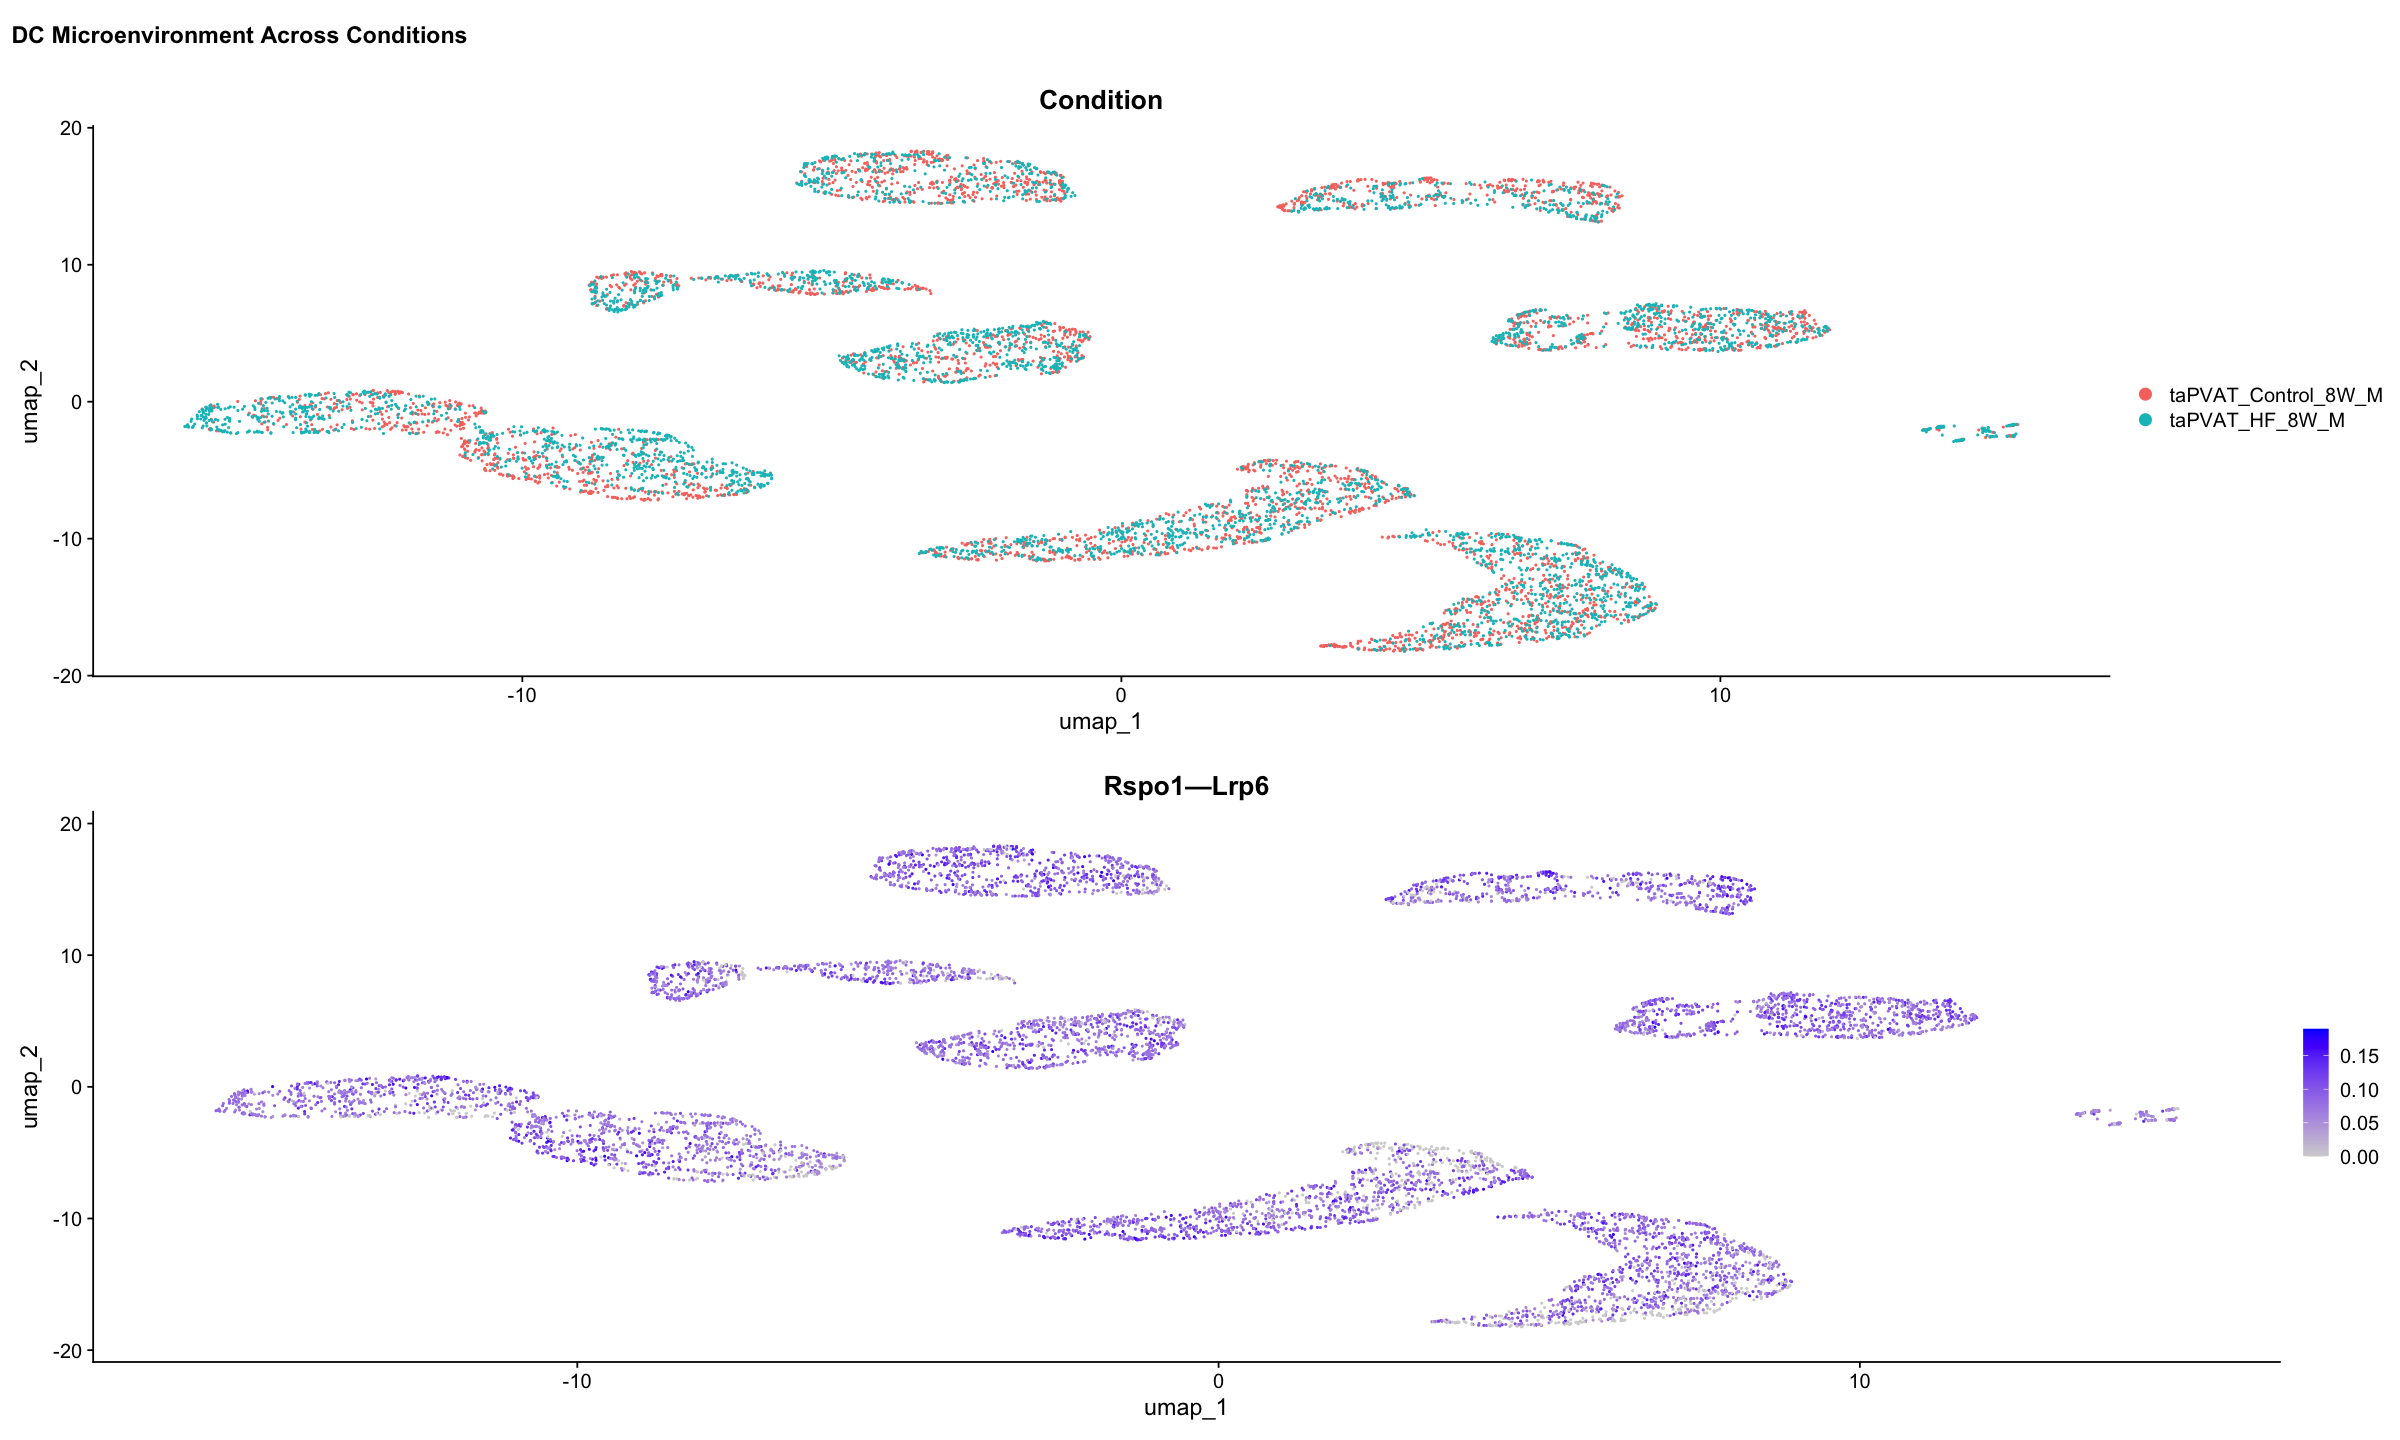

In [69]:
subs <- subset(scc.sub, idents = 'Adipocytes')
subs <- ScaleData(subs)
subs <- RunPCA(subs)
subs <- RunUMAP(subs,dims = 1:5)
p1 <- DimPlot(subs,group.by = 'Condition')
p2 <- FeaturePlot(subs,'Rspo1—Lrp6')
title <- ggdraw() + 
  draw_label(
    "DC Microenvironment Across Conditions",
    fontface = 'bold',
    x = 0,
    hjust = 0
  ) +
  theme(
    # add margin on the left of the drawing canvas,
    # so title is aligned with left edge of first plot
    plot.margin = margin(0, 0, 0, 7)
  )
plot_grid(title,p1,p2,ncol=1,rel_heights = c(0.1, 1,1))